# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 44026 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)


  0% (    1 of 44026) |           | Elapsed Time: 0:00:33 ETA:  17 days, 4:14:05

  0% (   66 of 44026) |                    | Elapsed Time: 0:00:34 ETA:  0:10:43

  0% (  129 of 44026) |                    | Elapsed Time: 0:00:35 ETA:  0:10:56

  0% (  191 of 44026) |                    | Elapsed Time: 0:00:36 ETA:  0:11:03

  0% (  255 of 44026) |                    | Elapsed Time: 0:00:37 ETA:  0:11:00

  0% (  321 of 44026) |                    | Elapsed Time: 0:00:38 ETA:  0:10:54

  0% (  388 of 44026) |                    | Elapsed Time: 0:00:39 ETA:  0:10:48

  1% (  453 of 44026) |                    | Elapsed Time: 0:00:40 ETA:  0:10:46

  1% (  517 of 44026) |                    | Elapsed Time: 0:00:41 ETA:  0:10:45

  1% (  551 of 44026) |                    | Elapsed Time: 0:00:42 ETA:  0:10:44

  1% (  618 of 44026) |                    | Elapsed Time: 0:00:43 ETA:  0:10:41

  1% (  684 of 44026) |                    | Elapsed Time: 0:00:44 ETA:  0:10:36

  1% (  742 of 44026) |                    | Elapsed Time: 0:00:45 ETA:  0:10:39

  1% (  813 of 44026) |                    | Elapsed Time: 0:00:46 ETA:  0:10:29

  2% (  881 of 44026) |                    | Elapsed Time: 0:00:47 ETA:  0:10:26

  2% (  950 of 44026) |                    | Elapsed Time: 0:00:48 ETA:  0:10:23

  2% ( 1021 of 44026) |                    | Elapsed Time: 0:00:49 ETA:  0:10:16

  2% ( 1101 of 44026) |                    | Elapsed Time: 0:00:50 ETA:  0:10:05

  2% ( 1169 of 44026) |                    | Elapsed Time: 0:00:51 ETA:  0:10:02

  2% ( 1234 of 44026) |                    | Elapsed Time: 0:00:52 ETA:  0:10:02

  2% ( 1296 of 44026) |                    | Elapsed Time: 0:00:53 ETA:  0:09:56

  3% ( 1365 of 44026) |                    | Elapsed Time: 0:00:54 ETA:  0:09:58

  3% ( 1438 of 44026) |                    | Elapsed Time: 0:00:55 ETA:  0:09:51

  3% ( 1503 of 44026) |                    | Elapsed Time: 0:00:56 ETA:  0:09:54

  3% ( 1565 of 44026) |                    | Elapsed Time: 0:00:57 ETA:  0:10:04

  3% ( 1622 of 44026) |                    | Elapsed Time: 0:00:58 ETA:  0:10:20

  3% ( 1651 of 44026) |                    | Elapsed Time: 0:00:59 ETA:  0:10:25

  3% ( 1709 of 44026) |                    | Elapsed Time: 0:01:00 ETA:  0:10:37

  4% ( 1767 of 44026) |                    | Elapsed Time: 0:01:01 ETA:  0:10:45

  4% ( 1824 of 44026) |                    | Elapsed Time: 0:01:02 ETA:  0:10:51

  4% ( 1886 of 44026) |                    | Elapsed Time: 0:01:03 ETA:  0:10:59

  4% ( 1947 of 44026) |                    | Elapsed Time: 0:01:04 ETA:  0:11:15

  4% ( 2013 of 44026) |                    | Elapsed Time: 0:01:05 ETA:  0:11:13

  4% ( 2082 of 44026) |                    | Elapsed Time: 0:01:06 ETA:  0:11:02

  4% ( 2148 of 44026) |                    | Elapsed Time: 0:01:07 ETA:  0:10:49

  5% ( 2202 of 44026) |#                   | Elapsed Time: 0:01:07 ETA:  0:10:39

  5% ( 2268 of 44026) |#                   | Elapsed Time: 0:01:08 ETA:  0:10:28

  5% ( 2339 of 44026) |#                   | Elapsed Time: 0:01:09 ETA:  0:10:12

  5% ( 2407 of 44026) |#                   | Elapsed Time: 0:01:10 ETA:  0:09:59

  5% ( 2475 of 44026) |#                   | Elapsed Time: 0:01:11 ETA:  0:09:50

  5% ( 2541 of 44026) |#                   | Elapsed Time: 0:01:12 ETA:  0:09:44

  5% ( 2608 of 44026) |#                   | Elapsed Time: 0:01:13 ETA:  0:09:41

  6% ( 2677 of 44026) |#                   | Elapsed Time: 0:01:14 ETA:  0:09:39

  6% ( 2752 of 44026) |#                   | Elapsed Time: 0:01:16 ETA:  0:09:36

  6% ( 2819 of 44026) |#                   | Elapsed Time: 0:01:17 ETA:  0:09:34

  6% ( 2888 of 44026) |#                   | Elapsed Time: 0:01:18 ETA:  0:09:34

  6% ( 2902 of 44026) |#                   | Elapsed Time: 0:01:19 ETA:  0:11:01

  6% ( 2969 of 44026) |#                   | Elapsed Time: 0:01:20 ETA:  0:11:01

  6% ( 3037 of 44026) |#                   | Elapsed Time: 0:01:21 ETA:  0:10:58

  7% ( 3106 of 44026) |#                   | Elapsed Time: 0:01:22 ETA:  0:10:54

  7% ( 3177 of 44026) |#                   | Elapsed Time: 0:01:23 ETA:  0:10:50

  7% ( 3248 of 44026) |#                   | Elapsed Time: 0:01:24 ETA:  0:10:46

  7% ( 3302 of 44026) |#                   | Elapsed Time: 0:01:25 ETA:  0:10:37

  7% ( 3373 of 44026) |#                   | Elapsed Time: 0:01:26 ETA:  0:10:31

  7% ( 3441 of 44026) |#                   | Elapsed Time: 0:01:27 ETA:  0:10:31

  7% ( 3504 of 44026) |#                   | Elapsed Time: 0:01:28 ETA:  0:09:18

  8% ( 3574 of 44026) |#                   | Elapsed Time: 0:01:29 ETA:  0:09:14

  8% ( 3640 of 44026) |#                   | Elapsed Time: 0:01:30 ETA:  0:09:15

  8% ( 3699 of 44026) |#                   | Elapsed Time: 0:01:31 ETA:  0:09:25

  8% ( 3770 of 44026) |#                   | Elapsed Time: 0:01:32 ETA:  0:09:25

  8% ( 3829 of 44026) |#                   | Elapsed Time: 0:01:33 ETA:  0:09:37

  8% ( 3853 of 44026) |#                   | Elapsed Time: 0:01:33 ETA:  0:09:43

  8% ( 3915 of 44026) |#                   | Elapsed Time: 0:01:34 ETA:  0:09:54

  9% ( 3977 of 44026) |#                   | Elapsed Time: 0:01:35 ETA:  0:10:00

  9% ( 4040 of 44026) |#                   | Elapsed Time: 0:01:36 ETA:  0:09:59

  9% ( 4101 of 44026) |#                   | Elapsed Time: 0:01:37 ETA:  0:10:09

  9% ( 4168 of 44026) |#                   | Elapsed Time: 0:01:38 ETA:  0:10:07

  9% ( 4225 of 44026) |#                   | Elapsed Time: 0:01:39 ETA:  0:10:10

  9% ( 4282 of 44026) |#                   | Elapsed Time: 0:01:40 ETA:  0:10:27

  9% ( 4347 of 44026) |#                   | Elapsed Time: 0:01:41 ETA:  0:10:19

 10% ( 4403 of 44026) |##                  | Elapsed Time: 0:01:42 ETA:  0:10:10

 10% ( 4469 of 44026) |##                  | Elapsed Time: 0:01:43 ETA:  0:10:04

 10% ( 4534 of 44026) |##                  | Elapsed Time: 0:01:44 ETA:  0:09:59

 10% ( 4596 of 44026) |##                  | Elapsed Time: 0:01:45 ETA:  0:09:59

 10% ( 4657 of 44026) |##                  | Elapsed Time: 0:01:46 ETA:  0:09:58

 10% ( 4724 of 44026) |##                  | Elapsed Time: 0:01:47 ETA:  0:09:57

 10% ( 4790 of 44026) |##                  | Elapsed Time: 0:01:48 ETA:  0:09:43

 11% ( 4860 of 44026) |##                  | Elapsed Time: 0:01:49 ETA:  0:09:27

 11% ( 4924 of 44026) |##                  | Elapsed Time: 0:01:50 ETA:  0:09:27

 11% ( 4953 of 44026) |##                  | Elapsed Time: 0:01:50 ETA:  0:09:32

 11% ( 5014 of 44026) |##                  | Elapsed Time: 0:01:51 ETA:  0:09:37

 11% ( 5077 of 44026) |##                  | Elapsed Time: 0:01:52 ETA:  0:09:39

 11% ( 5141 of 44026) |##                  | Elapsed Time: 0:01:53 ETA:  0:09:35

 11% ( 5202 of 44026) |##                  | Elapsed Time: 0:01:55 ETA:  0:09:35

 11% ( 5261 of 44026) |##                  | Elapsed Time: 0:01:56 ETA:  0:09:45

 12% ( 5326 of 44026) |##                  | Elapsed Time: 0:01:57 ETA:  0:09:45

 12% ( 5389 of 44026) |##                  | Elapsed Time: 0:01:58 ETA:  0:09:54

 12% ( 5454 of 44026) |##                  | Elapsed Time: 0:01:59 ETA:  0:09:51

 12% ( 5504 of 44026) |##                  | Elapsed Time: 0:01:59 ETA:  0:09:48

 12% ( 5563 of 44026) |##                  | Elapsed Time: 0:02:00 ETA:  0:09:49

 12% ( 5626 of 44026) |##                  | Elapsed Time: 0:02:01 ETA:  0:09:48

 12% ( 5692 of 44026) |##                  | Elapsed Time: 0:02:02 ETA:  0:09:45

 13% ( 5752 of 44026) |##                  | Elapsed Time: 0:02:03 ETA:  0:09:44

 13% ( 5818 of 44026) |##                  | Elapsed Time: 0:02:04 ETA:  0:09:33

 13% ( 5884 of 44026) |##                  | Elapsed Time: 0:02:05 ETA:  0:09:32

 13% ( 5950 of 44026) |##                  | Elapsed Time: 0:02:06 ETA:  0:09:28

 13% ( 6014 of 44026) |##                  | Elapsed Time: 0:02:07 ETA:  0:09:27

 13% ( 6054 of 44026) |##                  | Elapsed Time: 0:02:08 ETA:  0:09:24

 13% ( 6123 of 44026) |##                  | Elapsed Time: 0:02:09 ETA:  0:09:11

 14% ( 6192 of 44026) |##                  | Elapsed Time: 0:02:10 ETA:  0:09:03

 14% ( 6260 of 44026) |##                  | Elapsed Time: 0:02:11 ETA:  0:09:00

 14% ( 6327 of 44026) |##                  | Elapsed Time: 0:02:12 ETA:  0:08:51

 14% ( 6387 of 44026) |##                  | Elapsed Time: 0:02:13 ETA:  0:08:57

 14% ( 6453 of 44026) |##                  | Elapsed Time: 0:02:14 ETA:  0:08:54

 14% ( 6507 of 44026) |##                  | Elapsed Time: 0:02:16 ETA:  0:10:28

 14% ( 6569 of 44026) |##                  | Elapsed Time: 0:02:17 ETA:  0:10:30

 15% ( 6604 of 44026) |###                 | Elapsed Time: 0:02:18 ETA:  0:10:33

 15% ( 6668 of 44026) |###                 | Elapsed Time: 0:02:19 ETA:  0:10:39

 15% ( 6735 of 44026) |###                 | Elapsed Time: 0:02:20 ETA:  0:10:41

 15% ( 6804 of 44026) |###                 | Elapsed Time: 0:02:21 ETA:  0:10:39

 15% ( 6874 of 44026) |###                 | Elapsed Time: 0:02:22 ETA:  0:10:34

 15% ( 6947 of 44026) |###                 | Elapsed Time: 0:02:23 ETA:  0:10:15

 15% ( 7010 of 44026) |###                 | Elapsed Time: 0:02:24 ETA:  0:10:19

 16% ( 7079 of 44026) |###                 | Elapsed Time: 0:02:25 ETA:  0:08:39

 16% ( 7155 of 44026) |###                 | Elapsed Time: 0:02:26 ETA:  0:08:25

 16% ( 7223 of 44026) |###                 | Elapsed Time: 0:02:27 ETA:  0:08:19

 16% ( 7290 of 44026) |###                 | Elapsed Time: 0:02:28 ETA:  0:08:18

 16% ( 7361 of 44026) |###                 | Elapsed Time: 0:02:29 ETA:  0:08:14

 16% ( 7433 of 44026) |###                 | Elapsed Time: 0:02:30 ETA:  0:08:11

 17% ( 7506 of 44026) |###                 | Elapsed Time: 0:02:31 ETA:  0:08:10

 17% ( 7577 of 44026) |###                 | Elapsed Time: 0:02:32 ETA:  0:08:00

 17% ( 7648 of 44026) |###                 | Elapsed Time: 0:02:33 ETA:  0:07:56

 17% ( 7705 of 44026) |###                 | Elapsed Time: 0:02:34 ETA:  0:07:54

 17% ( 7774 of 44026) |###                 | Elapsed Time: 0:02:35 ETA:  0:07:55

 17% ( 7843 of 44026) |###                 | Elapsed Time: 0:02:36 ETA:  0:07:53

 17% ( 7911 of 44026) |###                 | Elapsed Time: 0:02:37 ETA:  0:07:50

 18% ( 7979 of 44026) |###                 | Elapsed Time: 0:02:38 ETA:  0:07:52

 18% ( 8047 of 44026) |###                 | Elapsed Time: 0:02:39 ETA:  0:07:55

 18% ( 8116 of 44026) |###                 | Elapsed Time: 0:02:40 ETA:  0:07:58

 18% ( 8186 of 44026) |###                 | Elapsed Time: 0:02:41 ETA:  0:07:58

 18% ( 8255 of 44026) |###                 | Elapsed Time: 0:02:42 ETA:  0:07:59

 18% ( 8323 of 44026) |###                 | Elapsed Time: 0:02:43 ETA:  0:08:02

 19% ( 8392 of 44026) |###                 | Elapsed Time: 0:02:44 ETA:  0:08:01

 19% ( 8463 of 44026) |###                 | Elapsed Time: 0:02:45 ETA:  0:07:59

 19% ( 8535 of 44026) |###                 | Elapsed Time: 0:02:46 ETA:  0:07:54

 19% ( 8605 of 44026) |###                 | Elapsed Time: 0:02:47 ETA:  0:07:51

 19% ( 8676 of 44026) |###                 | Elapsed Time: 0:02:48 ETA:  0:07:47

 19% ( 8746 of 44026) |###                 | Elapsed Time: 0:02:49 ETA:  0:07:45

 20% ( 8806 of 44026) |####                | Elapsed Time: 0:02:50 ETA:  0:07:44

 20% ( 8875 of 44026) |####                | Elapsed Time: 0:02:51 ETA:  0:07:42

 20% ( 8947 of 44026) |####                | Elapsed Time: 0:02:52 ETA:  0:07:37

 20% ( 9019 of 44026) |####                | Elapsed Time: 0:02:53 ETA:  0:07:33

 20% ( 9092 of 44026) |####                | Elapsed Time: 0:02:54 ETA:  0:07:30

 20% ( 9163 of 44026) |####                | Elapsed Time: 0:02:55 ETA:  0:07:30

 20% ( 9233 of 44026) |####                | Elapsed Time: 0:02:56 ETA:  0:07:28

 21% ( 9305 of 44026) |####                | Elapsed Time: 0:02:57 ETA:  0:07:26

 21% ( 9356 of 44026) |####                | Elapsed Time: 0:02:57 ETA:  0:07:24

 21% ( 9426 of 44026) |####                | Elapsed Time: 0:02:58 ETA:  0:07:23

 21% ( 9498 of 44026) |####                | Elapsed Time: 0:02:59 ETA:  0:07:19

 21% ( 9568 of 44026) |####                | Elapsed Time: 0:03:00 ETA:  0:07:20

 21% ( 9639 of 44026) |####                | Elapsed Time: 0:03:01 ETA:  0:07:21

 22% ( 9709 of 44026) |####                | Elapsed Time: 0:03:02 ETA:  0:07:22

 22% ( 9781 of 44026) |####                | Elapsed Time: 0:03:03 ETA:  0:07:20

 22% ( 9852 of 44026) |####                | Elapsed Time: 0:03:04 ETA:  0:07:18

 22% ( 9906 of 44026) |####                | Elapsed Time: 0:03:05 ETA:  0:07:19

 22% ( 9977 of 44026) |####                | Elapsed Time: 0:03:06 ETA:  0:07:18

 22% (10044 of 44026) |####                | Elapsed Time: 0:03:07 ETA:  0:07:19

 22% (10116 of 44026) |####                | Elapsed Time: 0:03:08 ETA:  0:07:19

 23% (10187 of 44026) |####                | Elapsed Time: 0:03:09 ETA:  0:07:17

 23% (10254 of 44026) |####                | Elapsed Time: 0:03:10 ETA:  0:07:20

 23% (10322 of 44026) |####                | Elapsed Time: 0:03:11 ETA:  0:07:21

 23% (10390 of 44026) |####                | Elapsed Time: 0:03:12 ETA:  0:07:24

 23% (10457 of 44026) |####                | Elapsed Time: 0:03:13 ETA:  0:07:28

 23% (10525 of 44026) |####                | Elapsed Time: 0:03:14 ETA:  0:07:29

 24% (10592 of 44026) |####                | Elapsed Time: 0:03:15 ETA:  0:07:32

 24% (10659 of 44026) |####                | Elapsed Time: 0:03:16 ETA:  0:07:32

 24% (10724 of 44026) |####                | Elapsed Time: 0:03:17 ETA:  0:07:38

 24% (10789 of 44026) |####                | Elapsed Time: 0:03:18 ETA:  0:07:43

 24% (10854 of 44026) |####                | Elapsed Time: 0:03:19 ETA:  0:07:45

 24% (10917 of 44026) |####                | Elapsed Time: 0:03:20 ETA:  0:07:50

 24% (10982 of 44026) |####                | Elapsed Time: 0:03:21 ETA:  0:07:52

 24% (10990 of 44026) |####                | Elapsed Time: 0:03:23 ETA:  0:09:57

 25% (11007 of 44026) |#####               | Elapsed Time: 0:03:23 ETA:  0:10:15

 25% (11064 of 44026) |#####               | Elapsed Time: 0:03:24 ETA:  0:10:31

 25% (11123 of 44026) |#####               | Elapsed Time: 0:03:25 ETA:  0:10:45

 25% (11182 of 44026) |#####               | Elapsed Time: 0:03:26 ETA:  0:10:56

 25% (11243 of 44026) |#####               | Elapsed Time: 0:03:27 ETA:  0:11:04

 25% (11302 of 44026) |#####               | Elapsed Time: 0:03:28 ETA:  0:11:15

 25% (11360 of 44026) |#####               | Elapsed Time: 0:03:29 ETA:  0:11:23

 25% (11415 of 44026) |#####               | Elapsed Time: 0:03:30 ETA:  0:11:43

 26% (11475 of 44026) |#####               | Elapsed Time: 0:03:31 ETA:  0:09:07

 26% (11536 of 44026) |#####               | Elapsed Time: 0:03:32 ETA:  0:09:03

 26% (11557 of 44026) |#####               | Elapsed Time: 0:03:33 ETA:  0:08:57

 26% (11621 of 44026) |#####               | Elapsed Time: 0:03:34 ETA:  0:08:47

 26% (11686 of 44026) |#####               | Elapsed Time: 0:03:35 ETA:  0:08:37

 26% (11752 of 44026) |#####               | Elapsed Time: 0:03:36 ETA:  0:08:28

 26% (11820 of 44026) |#####               | Elapsed Time: 0:03:37 ETA:  0:08:14

 26% (11886 of 44026) |#####               | Elapsed Time: 0:03:38 ETA:  0:08:02

 27% (11953 of 44026) |#####               | Elapsed Time: 0:03:39 ETA:  0:07:46

 27% (12021 of 44026) |#####               | Elapsed Time: 0:03:40 ETA:  0:07:35

 27% (12086 of 44026) |#####               | Elapsed Time: 0:03:41 ETA:  0:07:29

 27% (12108 of 44026) |#####               | Elapsed Time: 0:03:41 ETA:  0:07:28

 27% (12175 of 44026) |#####               | Elapsed Time: 0:03:42 ETA:  0:07:22

 27% (12244 of 44026) |#####               | Elapsed Time: 0:03:43 ETA:  0:07:17

 27% (12312 of 44026) |#####               | Elapsed Time: 0:03:44 ETA:  0:07:14

 28% (12381 of 44026) |#####               | Elapsed Time: 0:03:45 ETA:  0:07:12

 28% (12448 of 44026) |#####               | Elapsed Time: 0:03:46 ETA:  0:07:10

 28% (12512 of 44026) |#####               | Elapsed Time: 0:03:47 ETA:  0:07:12

 28% (12577 of 44026) |#####               | Elapsed Time: 0:03:48 ETA:  0:07:15

 28% (12644 of 44026) |#####               | Elapsed Time: 0:03:49 ETA:  0:07:12

 28% (12658 of 44026) |#####               | Elapsed Time: 0:03:49 ETA:  0:07:13

 28% (12724 of 44026) |#####               | Elapsed Time: 0:03:50 ETA:  0:07:14

 29% (12789 of 44026) |#####               | Elapsed Time: 0:03:51 ETA:  0:07:17

 29% (12857 of 44026) |#####               | Elapsed Time: 0:03:52 ETA:  0:07:15

 29% (12918 of 44026) |#####               | Elapsed Time: 0:03:53 ETA:  0:07:24

 29% (12985 of 44026) |#####               | Elapsed Time: 0:03:54 ETA:  0:07:24

 29% (13054 of 44026) |#####               | Elapsed Time: 0:03:55 ETA:  0:07:16

 29% (13121 of 44026) |#####               | Elapsed Time: 0:03:56 ETA:  0:07:12

 29% (13188 of 44026) |#####               | Elapsed Time: 0:03:57 ETA:  0:07:12

 30% (13208 of 44026) |######              | Elapsed Time: 0:03:58 ETA:  0:07:15

 30% (13278 of 44026) |######              | Elapsed Time: 0:03:59 ETA:  0:07:08

 30% (13346 of 44026) |######              | Elapsed Time: 0:04:00 ETA:  0:07:05

 30% (13416 of 44026) |######              | Elapsed Time: 0:04:01 ETA:  0:07:02

 30% (13483 of 44026) |######              | Elapsed Time: 0:04:02 ETA:  0:06:54

 30% (13551 of 44026) |######              | Elapsed Time: 0:04:03 ETA:  0:06:50

 30% (13619 of 44026) |######              | Elapsed Time: 0:04:04 ETA:  0:06:51

 31% (13689 of 44026) |######              | Elapsed Time: 0:04:05 ETA:  0:06:47

 31% (13759 of 44026) |######              | Elapsed Time: 0:04:06 ETA:  0:06:38

 31% (13824 of 44026) |######              | Elapsed Time: 0:04:07 ETA:  0:06:37

 31% (13892 of 44026) |######              | Elapsed Time: 0:04:08 ETA:  0:06:38

 31% (13958 of 44026) |######              | Elapsed Time: 0:04:09 ETA:  0:06:39

 31% (14024 of 44026) |######              | Elapsed Time: 0:04:10 ETA:  0:06:42

 32% (14090 of 44026) |######              | Elapsed Time: 0:04:11 ETA:  0:06:42

 32% (14159 of 44026) |######              | Elapsed Time: 0:04:12 ETA:  0:06:41

 32% (14226 of 44026) |######              | Elapsed Time: 0:04:13 ETA:  0:06:41

 32% (14309 of 44026) |######              | Elapsed Time: 0:04:14 ETA:  0:06:44

 32% (14383 of 44026) |######              | Elapsed Time: 0:04:15 ETA:  0:06:32

 32% (14454 of 44026) |######              | Elapsed Time: 0:04:16 ETA:  0:06:28

 32% (14521 of 44026) |######              | Elapsed Time: 0:04:17 ETA:  0:06:25

 33% (14588 of 44026) |######              | Elapsed Time: 0:04:18 ETA:  0:06:24

 33% (14661 of 44026) |######              | Elapsed Time: 0:04:19 ETA:  0:06:14

 33% (14736 of 44026) |######              | Elapsed Time: 0:04:20 ETA:  0:06:06

 33% (14810 of 44026) |######              | Elapsed Time: 0:04:21 ETA:  0:05:57

 33% (14859 of 44026) |######              | Elapsed Time: 0:04:22 ETA:  0:05:57

 33% (14932 of 44026) |######              | Elapsed Time: 0:04:23 ETA:  0:05:55

 34% (15005 of 44026) |######              | Elapsed Time: 0:04:24 ETA:  0:05:54

 34% (15076 of 44026) |######              | Elapsed Time: 0:04:25 ETA:  0:05:54

 34% (15146 of 44026) |######              | Elapsed Time: 0:04:26 ETA:  0:05:51

 34% (15215 of 44026) |######              | Elapsed Time: 0:04:27 ETA:  0:05:47

 34% (15286 of 44026) |######              | Elapsed Time: 0:04:28 ETA:  0:05:49

 34% (15355 of 44026) |######              | Elapsed Time: 0:04:29 ETA:  0:05:54

 35% (15410 of 44026) |#######             | Elapsed Time: 0:04:30 ETA:  0:05:56

 35% (15476 of 44026) |#######             | Elapsed Time: 0:04:31 ETA:  0:06:00

 35% (15540 of 44026) |#######             | Elapsed Time: 0:04:32 ETA:  0:06:08

 35% (15605 of 44026) |#######             | Elapsed Time: 0:04:33 ETA:  0:06:16

 35% (15670 of 44026) |#######             | Elapsed Time: 0:04:34 ETA:  0:06:21

 35% (15739 of 44026) |#######             | Elapsed Time: 0:04:35 ETA:  0:06:21

 35% (15808 of 44026) |#######             | Elapsed Time: 0:04:36 ETA:  0:06:20

 36% (15874 of 44026) |#######             | Elapsed Time: 0:04:37 ETA:  0:06:24

 36% (15938 of 44026) |#######             | Elapsed Time: 0:04:38 ETA:  0:06:29

 36% (15960 of 44026) |#######             | Elapsed Time: 0:04:38 ETA:  0:06:32

 36% (16030 of 44026) |#######             | Elapsed Time: 0:04:39 ETA:  0:06:26

 36% (16094 of 44026) |#######             | Elapsed Time: 0:04:40 ETA:  0:06:25

 36% (16161 of 44026) |#######             | Elapsed Time: 0:04:41 ETA:  0:06:22

 36% (16223 of 44026) |#######             | Elapsed Time: 0:04:42 ETA:  0:06:23

 36% (16286 of 44026) |#######             | Elapsed Time: 0:04:43 ETA:  0:06:29

 37% (16349 of 44026) |#######             | Elapsed Time: 0:04:44 ETA:  0:06:35

 37% (16416 of 44026) |#######             | Elapsed Time: 0:04:45 ETA:  0:06:33

 37% (16480 of 44026) |#######             | Elapsed Time: 0:04:46 ETA:  0:06:31

 37% (16486 of 44026) |#######             | Elapsed Time: 0:04:48 ETA:  0:09:32

 37% (16510 of 44026) |#######             | Elapsed Time: 0:04:49 ETA:  0:09:58

 37% (16568 of 44026) |#######             | Elapsed Time: 0:04:50 ETA:  0:10:09

 37% (16615 of 44026) |#######             | Elapsed Time: 0:04:51 ETA:  0:10:49

 37% (16664 of 44026) |#######             | Elapsed Time: 0:04:52 ETA:  0:11:16

 37% (16726 of 44026) |#######             | Elapsed Time: 0:04:53 ETA:  0:11:18

 38% (16790 of 44026) |#######             | Elapsed Time: 0:04:54 ETA:  0:11:15

 38% (16853 of 44026) |#######             | Elapsed Time: 0:04:55 ETA:  0:11:24

 38% (16914 of 44026) |#######             | Elapsed Time: 0:04:56 ETA:  0:11:31

 38% (16977 of 44026) |#######             | Elapsed Time: 0:04:57 ETA:  0:07:44

 38% (17044 of 44026) |#######             | Elapsed Time: 0:04:58 ETA:  0:07:31

 38% (17061 of 44026) |#######             | Elapsed Time: 0:04:58 ETA:  0:07:24

 38% (17122 of 44026) |#######             | Elapsed Time: 0:04:59 ETA:  0:07:02

 39% (17189 of 44026) |#######             | Elapsed Time: 0:05:00 ETA:  0:06:37

 39% (17251 of 44026) |#######             | Elapsed Time: 0:05:01 ETA:  0:06:36

 39% (17317 of 44026) |#######             | Elapsed Time: 0:05:02 ETA:  0:06:32

 39% (17383 of 44026) |#######             | Elapsed Time: 0:05:03 ETA:  0:06:27

 39% (17448 of 44026) |#######             | Elapsed Time: 0:05:04 ETA:  0:06:20

 39% (17517 of 44026) |#######             | Elapsed Time: 0:05:05 ETA:  0:06:11

 39% (17591 of 44026) |#######             | Elapsed Time: 0:05:06 ETA:  0:06:02

 40% (17611 of 44026) |########            | Elapsed Time: 0:05:06 ETA:  0:06:01

 40% (17681 of 44026) |########            | Elapsed Time: 0:05:07 ETA:  0:05:50

 40% (17750 of 44026) |########            | Elapsed Time: 0:05:08 ETA:  0:05:46

 40% (17821 of 44026) |########            | Elapsed Time: 0:05:09 ETA:  0:05:34

 40% (17890 of 44026) |########            | Elapsed Time: 0:05:10 ETA:  0:05:30

 40% (17960 of 44026) |########            | Elapsed Time: 0:05:11 ETA:  0:05:24

 40% (18025 of 44026) |########            | Elapsed Time: 0:05:12 ETA:  0:05:23

 41% (18088 of 44026) |########            | Elapsed Time: 0:05:13 ETA:  0:05:28

 41% (18161 of 44026) |########            | Elapsed Time: 0:05:15 ETA:  0:05:41

 41% (18225 of 44026) |########            | Elapsed Time: 0:05:16 ETA:  0:05:48

 41% (18296 of 44026) |########            | Elapsed Time: 0:05:17 ETA:  0:05:44

 41% (18366 of 44026) |########            | Elapsed Time: 0:05:18 ETA:  0:05:44

 41% (18438 of 44026) |########            | Elapsed Time: 0:05:19 ETA:  0:05:40

 42% (18510 of 44026) |########            | Elapsed Time: 0:05:20 ETA:  0:05:37

 42% (18586 of 44026) |########            | Elapsed Time: 0:05:21 ETA:  0:05:23

 42% (18656 of 44026) |########            | Elapsed Time: 0:05:22 ETA:  0:05:14

 42% (18712 of 44026) |########            | Elapsed Time: 0:05:22 ETA:  0:05:06

 42% (18780 of 44026) |########            | Elapsed Time: 0:05:23 ETA:  0:05:06

 42% (18848 of 44026) |########            | Elapsed Time: 0:05:24 ETA:  0:05:01

 42% (18916 of 44026) |########            | Elapsed Time: 0:05:25 ETA:  0:05:03

 43% (18980 of 44026) |########            | Elapsed Time: 0:05:26 ETA:  0:05:09

 43% (19048 of 44026) |########            | Elapsed Time: 0:05:27 ETA:  0:05:12

 43% (19116 of 44026) |########            | Elapsed Time: 0:05:28 ETA:  0:05:15

 43% (19186 of 44026) |########            | Elapsed Time: 0:05:29 ETA:  0:05:21

 43% (19262 of 44026) |########            | Elapsed Time: 0:05:30 ETA:  0:05:19

 43% (19336 of 44026) |########            | Elapsed Time: 0:05:31 ETA:  0:05:12

 44% (19407 of 44026) |########            | Elapsed Time: 0:05:33 ETA:  0:05:07

 44% (19473 of 44026) |########            | Elapsed Time: 0:05:34 ETA:  0:05:08

 44% (19537 of 44026) |########            | Elapsed Time: 0:05:35 ETA:  0:05:08

 44% (19600 of 44026) |########            | Elapsed Time: 0:05:36 ETA:  0:05:12

 44% (19668 of 44026) |########            | Elapsed Time: 0:05:37 ETA:  0:05:12

 44% (19735 of 44026) |########            | Elapsed Time: 0:05:38 ETA:  0:05:14

 45% (19812 of 44026) |#########           | Elapsed Time: 0:05:39 ETA:  0:05:18

 45% (19883 of 44026) |#########           | Elapsed Time: 0:05:40 ETA:  0:05:19

 45% (19955 of 44026) |#########           | Elapsed Time: 0:05:41 ETA:  0:05:16

 45% (20022 of 44026) |#########           | Elapsed Time: 0:05:42 ETA:  0:05:14

 45% (20090 of 44026) |#########           | Elapsed Time: 0:05:43 ETA:  0:05:08

 45% (20155 of 44026) |#########           | Elapsed Time: 0:05:44 ETA:  0:05:05

 45% (20222 of 44026) |#########           | Elapsed Time: 0:05:45 ETA:  0:05:05

 46% (20288 of 44026) |#########           | Elapsed Time: 0:05:46 ETA:  0:05:04

 46% (20363 of 44026) |#########           | Elapsed Time: 0:05:47 ETA:  0:05:04

 46% (20432 of 44026) |#########           | Elapsed Time: 0:05:48 ETA:  0:05:05

 46% (20505 of 44026) |#########           | Elapsed Time: 0:05:49 ETA:  0:05:03

 46% (20575 of 44026) |#########           | Elapsed Time: 0:05:50 ETA:  0:04:59

 46% (20647 of 44026) |#########           | Elapsed Time: 0:05:51 ETA:  0:04:53

 47% (20716 of 44026) |#########           | Elapsed Time: 0:05:52 ETA:  0:04:47

 47% (20786 of 44026) |#########           | Elapsed Time: 0:05:53 ETA:  0:04:44

 47% (20845 of 44026) |#########           | Elapsed Time: 0:05:54 ETA:  0:04:51

 47% (20913 of 44026) |#########           | Elapsed Time: 0:05:55 ETA:  0:05:01

 47% (20971 of 44026) |#########           | Elapsed Time: 0:05:56 ETA:  0:05:13

 47% (21027 of 44026) |#########           | Elapsed Time: 0:05:57 ETA:  0:05:34

 47% (21086 of 44026) |#########           | Elapsed Time: 0:05:58 ETA:  0:05:48

 48% (21158 of 44026) |#########           | Elapsed Time: 0:05:59 ETA:  0:05:48

 48% (21213 of 44026) |#########           | Elapsed Time: 0:06:00 ETA:  0:06:08

 48% (21278 of 44026) |#########           | Elapsed Time: 0:06:01 ETA:  0:06:14

 48% (21350 of 44026) |#########           | Elapsed Time: 0:06:02 ETA:  0:05:54

 48% (21423 of 44026) |#########           | Elapsed Time: 0:06:03 ETA:  0:05:33

 48% (21463 of 44026) |#########           | Elapsed Time: 0:06:04 ETA:  0:05:28

 48% (21530 of 44026) |#########           | Elapsed Time: 0:06:05 ETA:  0:05:16

 49% (21599 of 44026) |#########           | Elapsed Time: 0:06:06 ETA:  0:05:00

 49% (21659 of 44026) |#########           | Elapsed Time: 0:06:07 ETA:  0:04:57

 49% (21731 of 44026) |#########           | Elapsed Time: 0:06:08 ETA:  0:04:56

 49% (21795 of 44026) |#########           | Elapsed Time: 0:06:09 ETA:  0:04:44

 49% (21860 of 44026) |#########           | Elapsed Time: 0:06:10 ETA:  0:04:43

 49% (21927 of 44026) |#########           | Elapsed Time: 0:06:11 ETA:  0:04:47

 49% (21996 of 44026) |#########           | Elapsed Time: 0:06:12 ETA:  0:04:51

 50% (22014 of 44026) |##########          | Elapsed Time: 0:06:12 ETA:  0:04:52

 50% (22087 of 44026) |##########          | Elapsed Time: 0:06:13 ETA:  0:04:43

 50% (22156 of 44026) |##########          | Elapsed Time: 0:06:14 ETA:  0:04:42

 50% (22226 of 44026) |##########          | Elapsed Time: 0:06:15 ETA:  0:04:30

 50% (22291 of 44026) |##########          | Elapsed Time: 0:06:16 ETA:  0:04:36

 50% (22355 of 44026) |##########          | Elapsed Time: 0:06:17 ETA:  0:04:36

 50% (22423 of 44026) |##########          | Elapsed Time: 0:06:18 ETA:  0:04:32

 51% (22492 of 44026) |##########          | Elapsed Time: 0:06:19 ETA:  0:04:28

 51% (22564 of 44026) |##########          | Elapsed Time: 0:06:20 ETA:  0:04:29

 51% (22638 of 44026) |##########          | Elapsed Time: 0:06:21 ETA:  0:04:27

 51% (22710 of 44026) |##########          | Elapsed Time: 0:06:22 ETA:  0:04:23

 51% (22781 of 44026) |##########          | Elapsed Time: 0:06:23 ETA:  0:04:20

 51% (22851 of 44026) |##########          | Elapsed Time: 0:06:24 ETA:  0:04:14

 52% (22911 of 44026) |##########          | Elapsed Time: 0:06:25 ETA:  0:04:16

 52% (22979 of 44026) |##########          | Elapsed Time: 0:06:26 ETA:  0:04:15

 52% (23050 of 44026) |##########          | Elapsed Time: 0:06:27 ETA:  0:04:12

 52% (23114 of 44026) |##########          | Elapsed Time: 0:06:28 ETA:  0:04:06

 52% (23182 of 44026) |##########          | Elapsed Time: 0:06:29 ETA:  0:04:08

 52% (23248 of 44026) |##########          | Elapsed Time: 0:06:30 ETA:  0:04:15

 52% (23259 of 44026) |##########          | Elapsed Time: 0:06:33 ETA:  0:07:35

 52% (23324 of 44026) |##########          | Elapsed Time: 0:06:34 ETA:  0:07:43

 53% (23389 of 44026) |##########          | Elapsed Time: 0:06:35 ETA:  0:07:50

 53% (23455 of 44026) |##########          | Elapsed Time: 0:06:36 ETA:  0:07:40

 53% (23524 of 44026) |##########          | Elapsed Time: 0:06:37 ETA:  0:07:38

 53% (23595 of 44026) |##########          | Elapsed Time: 0:06:38 ETA:  0:07:37

 53% (23664 of 44026) |##########          | Elapsed Time: 0:06:39 ETA:  0:07:34

 53% (23736 of 44026) |##########          | Elapsed Time: 0:06:40 ETA:  0:07:27

 54% (23808 of 44026) |##########          | Elapsed Time: 0:06:41 ETA:  0:07:17

 54% (23882 of 44026) |##########          | Elapsed Time: 0:06:42 ETA:  0:03:55

 54% (23956 of 44026) |##########          | Elapsed Time: 0:06:43 ETA:  0:03:45

 54% (24027 of 44026) |##########          | Elapsed Time: 0:06:44 ETA:  0:03:38

 54% (24099 of 44026) |##########          | Elapsed Time: 0:06:45 ETA:  0:03:31

 54% (24169 of 44026) |##########          | Elapsed Time: 0:06:46 ETA:  0:03:29

 55% (24215 of 44026) |###########         | Elapsed Time: 0:06:46 ETA:  0:03:25

 55% (24289 of 44026) |###########         | Elapsed Time: 0:06:47 ETA:  0:03:22

 55% (24352 of 44026) |###########         | Elapsed Time: 0:06:48 ETA:  0:03:30

 55% (24414 of 44026) |###########         | Elapsed Time: 0:06:49 ETA:  0:03:39

 55% (24483 of 44026) |###########         | Elapsed Time: 0:06:50 ETA:  0:03:44

 55% (24553 of 44026) |###########         | Elapsed Time: 0:06:51 ETA:  0:03:48

 55% (24620 of 44026) |###########         | Elapsed Time: 0:06:52 ETA:  0:03:51

 56% (24676 of 44026) |###########         | Elapsed Time: 0:06:53 ETA:  0:04:08

 56% (24730 of 44026) |###########         | Elapsed Time: 0:06:54 ETA:  0:04:26

 56% (24765 of 44026) |###########         | Elapsed Time: 0:06:55 ETA:  0:04:39

 56% (24830 of 44026) |###########         | Elapsed Time: 0:06:56 ETA:  0:04:49

 56% (24907 of 44026) |###########         | Elapsed Time: 0:06:57 ETA:  0:04:30

 56% (24975 of 44026) |###########         | Elapsed Time: 0:06:58 ETA:  0:04:21

 56% (25038 of 44026) |###########         | Elapsed Time: 0:06:59 ETA:  0:04:28

 57% (25102 of 44026) |###########         | Elapsed Time: 0:07:00 ETA:  0:04:34

 57% (25171 of 44026) |###########         | Elapsed Time: 0:07:01 ETA:  0:04:31

 57% (25244 of 44026) |###########         | Elapsed Time: 0:07:02 ETA:  0:04:09

 57% (25315 of 44026) |###########         | Elapsed Time: 0:07:03 ETA:  0:03:47

 57% (25387 of 44026) |###########         | Elapsed Time: 0:07:04 ETA:  0:03:35

 57% (25459 of 44026) |###########         | Elapsed Time: 0:07:05 ETA:  0:03:27

 57% (25528 of 44026) |###########         | Elapsed Time: 0:07:06 ETA:  0:03:35

 58% (25586 of 44026) |###########         | Elapsed Time: 0:07:07 ETA:  0:03:45

 58% (25654 of 44026) |###########         | Elapsed Time: 0:07:08 ETA:  0:03:38

 58% (25723 of 44026) |###########         | Elapsed Time: 0:07:09 ETA:  0:03:33

 58% (25793 of 44026) |###########         | Elapsed Time: 0:07:10 ETA:  0:03:31

 58% (25866 of 44026) |###########         | Elapsed Time: 0:07:11 ETA:  0:03:38

 58% (25934 of 44026) |###########         | Elapsed Time: 0:07:12 ETA:  0:03:41

 59% (26003 of 44026) |###########         | Elapsed Time: 0:07:13 ETA:  0:03:43

 59% (26058 of 44026) |###########         | Elapsed Time: 0:07:14 ETA:  0:03:59

 59% (26122 of 44026) |###########         | Elapsed Time: 0:07:15 ETA:  0:03:50

 59% (26189 of 44026) |###########         | Elapsed Time: 0:07:16 ETA:  0:03:50

 59% (26258 of 44026) |###########         | Elapsed Time: 0:07:17 ETA:  0:03:48

 59% (26331 of 44026) |###########         | Elapsed Time: 0:07:18 ETA:  0:03:43

 60% (26416 of 44026) |############        | Elapsed Time: 0:07:20 ETA:  0:03:39

 60% (26483 of 44026) |############        | Elapsed Time: 0:07:21 ETA:  0:03:40

 60% (26556 of 44026) |############        | Elapsed Time: 0:07:22 ETA:  0:03:35

 60% (26625 of 44026) |############        | Elapsed Time: 0:07:23 ETA:  0:03:17

 60% (26690 of 44026) |############        | Elapsed Time: 0:07:24 ETA:  0:03:15

 60% (26757 of 44026) |############        | Elapsed Time: 0:07:25 ETA:  0:03:14

 60% (26828 of 44026) |############        | Elapsed Time: 0:07:26 ETA:  0:03:11

 61% (26901 of 44026) |############        | Elapsed Time: 0:07:27 ETA:  0:03:10

 61% (26966 of 44026) |############        | Elapsed Time: 0:07:28 ETA:  0:03:11

 61% (27030 of 44026) |############        | Elapsed Time: 0:07:29 ETA:  0:03:16

 61% (27097 of 44026) |############        | Elapsed Time: 0:07:30 ETA:  0:03:15

 61% (27171 of 44026) |############        | Elapsed Time: 0:07:31 ETA:  0:03:13

 61% (27230 of 44026) |############        | Elapsed Time: 0:07:32 ETA:  0:03:23

 61% (27294 of 44026) |############        | Elapsed Time: 0:07:33 ETA:  0:03:23

 62% (27363 of 44026) |############        | Elapsed Time: 0:07:34 ETA:  0:03:19

 62% (27433 of 44026) |############        | Elapsed Time: 0:07:35 ETA:  0:03:20

 62% (27496 of 44026) |############        | Elapsed Time: 0:07:36 ETA:  0:03:31

 62% (27517 of 44026) |############        | Elapsed Time: 0:07:36 ETA:  0:03:35

 62% (27578 of 44026) |############        | Elapsed Time: 0:07:37 ETA:  0:03:38

 62% (27646 of 44026) |############        | Elapsed Time: 0:07:38 ETA:  0:03:36

 62% (27712 of 44026) |############        | Elapsed Time: 0:07:39 ETA:  0:03:45

 63% (27784 of 44026) |############        | Elapsed Time: 0:07:40 ETA:  0:03:27

 63% (27855 of 44026) |############        | Elapsed Time: 0:07:41 ETA:  0:03:17

 63% (27931 of 44026) |############        | Elapsed Time: 0:07:42 ETA:  0:03:09

 63% (28002 of 44026) |############        | Elapsed Time: 0:07:43 ETA:  0:03:07

 63% (28067 of 44026) |############        | Elapsed Time: 0:07:44 ETA:  0:02:57

 63% (28135 of 44026) |############        | Elapsed Time: 0:07:45 ETA:  0:02:55

 64% (28207 of 44026) |############        | Elapsed Time: 0:07:46 ETA:  0:02:42

 64% (28277 of 44026) |############        | Elapsed Time: 0:07:47 ETA:  0:02:39

 64% (28349 of 44026) |############        | Elapsed Time: 0:07:48 ETA:  0:02:32

 64% (28419 of 44026) |############        | Elapsed Time: 0:07:49 ETA:  0:02:33

 64% (28491 of 44026) |############        | Elapsed Time: 0:07:50 ETA:  0:02:32

 64% (28563 of 44026) |############        | Elapsed Time: 0:07:51 ETA:  0:02:34

 65% (28617 of 44026) |#############       | Elapsed Time: 0:07:52 ETA:  0:02:32

 65% (28680 of 44026) |#############       | Elapsed Time: 0:07:53 ETA:  0:02:40

 65% (28741 of 44026) |#############       | Elapsed Time: 0:07:54 ETA:  0:02:46

 65% (28806 of 44026) |#############       | Elapsed Time: 0:07:55 ETA:  0:02:53

 65% (28874 of 44026) |#############       | Elapsed Time: 0:07:56 ETA:  0:02:54

 65% (28945 of 44026) |#############       | Elapsed Time: 0:07:57 ETA:  0:02:55

 65% (29015 of 44026) |#############       | Elapsed Time: 0:07:58 ETA:  0:02:53

 66% (29080 of 44026) |#############       | Elapsed Time: 0:07:59 ETA:  0:02:59

 66% (29133 of 44026) |#############       | Elapsed Time: 0:08:00 ETA:  0:03:21

 66% (29168 of 44026) |#############       | Elapsed Time: 0:08:00 ETA:  0:03:22

 66% (29242 of 44026) |#############       | Elapsed Time: 0:08:01 ETA:  0:03:07

 66% (29314 of 44026) |#############       | Elapsed Time: 0:08:02 ETA:  0:02:53

 66% (29390 of 44026) |#############       | Elapsed Time: 0:08:03 ETA:  0:02:39

 66% (29464 of 44026) |#############       | Elapsed Time: 0:08:04 ETA:  0:02:31

 67% (29535 of 44026) |#############       | Elapsed Time: 0:08:05 ETA:  0:02:30

 67% (29605 of 44026) |#############       | Elapsed Time: 0:08:06 ETA:  0:02:29

 67% (29675 of 44026) |#############       | Elapsed Time: 0:08:07 ETA:  0:02:22

 67% (29718 of 44026) |#############       | Elapsed Time: 0:08:08 ETA:  0:02:05

 67% (29784 of 44026) |#############       | Elapsed Time: 0:08:09 ETA:  0:02:11

 67% (29859 of 44026) |#############       | Elapsed Time: 0:08:10 ETA:  0:02:09

 67% (29927 of 44026) |#############       | Elapsed Time: 0:08:11 ETA:  0:02:12

 68% (29997 of 44026) |#############       | Elapsed Time: 0:08:12 ETA:  0:02:17

 68% (30068 of 44026) |#############       | Elapsed Time: 0:08:13 ETA:  0:02:19

 68% (30137 of 44026) |#############       | Elapsed Time: 0:08:14 ETA:  0:02:20

 68% (30207 of 44026) |#############       | Elapsed Time: 0:08:15 ETA:  0:02:19

 68% (30268 of 44026) |#############       | Elapsed Time: 0:08:16 ETA:  0:02:20

 68% (30327 of 44026) |#############       | Elapsed Time: 0:08:17 ETA:  0:02:29

 69% (30383 of 44026) |#############       | Elapsed Time: 0:08:18 ETA:  0:02:39

 69% (30447 of 44026) |#############       | Elapsed Time: 0:08:19 ETA:  0:02:50

 69% (30508 of 44026) |#############       | Elapsed Time: 0:08:20 ETA:  0:02:58

 69% (30569 of 44026) |#############       | Elapsed Time: 0:08:21 ETA:  0:03:08

 69% (30630 of 44026) |#############       | Elapsed Time: 0:08:22 ETA:  0:03:20

 69% (30695 of 44026) |#############       | Elapsed Time: 0:08:23 ETA:  0:03:23

 69% (30763 of 44026) |#############       | Elapsed Time: 0:08:24 ETA:  0:03:24

 70% (30819 of 44026) |##############      | Elapsed Time: 0:08:25 ETA:  0:03:22

 70% (30887 of 44026) |##############      | Elapsed Time: 0:08:26 ETA:  0:03:09

 70% (30950 of 44026) |##############      | Elapsed Time: 0:08:27 ETA:  0:02:59

 70% (31009 of 44026) |##############      | Elapsed Time: 0:08:28 ETA:  0:03:04

 70% (31072 of 44026) |##############      | Elapsed Time: 0:08:29 ETA:  0:03:01

 70% (31141 of 44026) |##############      | Elapsed Time: 0:08:30 ETA:  0:02:51

 70% (31213 of 44026) |##############      | Elapsed Time: 0:08:31 ETA:  0:02:37

 71% (31276 of 44026) |##############      | Elapsed Time: 0:08:32 ETA:  0:02:39

 71% (31352 of 44026) |##############      | Elapsed Time: 0:08:33 ETA:  0:02:29

 71% (31369 of 44026) |##############      | Elapsed Time: 0:08:33 ETA:  0:02:32

 71% (31432 of 44026) |##############      | Elapsed Time: 0:08:34 ETA:  0:02:37

 71% (31501 of 44026) |##############      | Elapsed Time: 0:08:35 ETA:  0:02:29

 71% (31572 of 44026) |##############      | Elapsed Time: 0:08:36 ETA:  0:02:14

 71% (31637 of 44026) |##############      | Elapsed Time: 0:08:37 ETA:  0:02:11

 71% (31653 of 44026) |##############      | Elapsed Time: 0:08:41 ETA:  0:06:54

 72% (31717 of 44026) |##############      | Elapsed Time: 0:08:42 ETA:  0:07:07

 72% (31784 of 44026) |##############      | Elapsed Time: 0:08:43 ETA:  0:06:59

 72% (31850 of 44026) |##############      | Elapsed Time: 0:08:44 ETA:  0:07:16

 72% (31919 of 44026) |##############      | Elapsed Time: 0:08:45 ETA:  0:07:21

 72% (31989 of 44026) |##############      | Elapsed Time: 0:08:46 ETA:  0:07:18

 72% (32049 of 44026) |##############      | Elapsed Time: 0:08:47 ETA:  0:07:40

 72% (32113 of 44026) |##############      | Elapsed Time: 0:08:48 ETA:  0:07:40

 73% (32178 of 44026) |##############      | Elapsed Time: 0:08:49 ETA:  0:02:33

 73% (32245 of 44026) |##############      | Elapsed Time: 0:08:50 ETA:  0:02:27

 73% (32312 of 44026) |##############      | Elapsed Time: 0:08:51 ETA:  0:02:26

 73% (32378 of 44026) |##############      | Elapsed Time: 0:08:52 ETA:  0:02:25

 73% (32445 of 44026) |##############      | Elapsed Time: 0:08:53 ETA:  0:02:22

 73% (32470 of 44026) |##############      | Elapsed Time: 0:08:53 ETA:  0:02:17

 73% (32536 of 44026) |##############      | Elapsed Time: 0:08:54 ETA:  0:02:21

 74% (32602 of 44026) |##############      | Elapsed Time: 0:08:55 ETA:  0:02:12

 74% (32669 of 44026) |##############      | Elapsed Time: 0:08:56 ETA:  0:02:08

 74% (32738 of 44026) |##############      | Elapsed Time: 0:08:57 ETA:  0:02:01

 74% (32809 of 44026) |##############      | Elapsed Time: 0:08:58 ETA:  0:01:56

 74% (32879 of 44026) |##############      | Elapsed Time: 0:08:59 ETA:  0:01:51

 74% (32949 of 44026) |##############      | Elapsed Time: 0:09:00 ETA:  0:01:46

 75% (33020 of 44026) |###############     | Elapsed Time: 0:09:01 ETA:  0:01:45

 75% (33093 of 44026) |###############     | Elapsed Time: 0:09:02 ETA:  0:01:35

 75% (33166 of 44026) |###############     | Elapsed Time: 0:09:03 ETA:  0:01:26

 75% (33234 of 44026) |###############     | Elapsed Time: 0:09:04 ETA:  0:01:24

 75% (33306 of 44026) |###############     | Elapsed Time: 0:09:05 ETA:  0:01:20

 75% (33379 of 44026) |###############     | Elapsed Time: 0:09:06 ETA:  0:01:17

 75% (33449 of 44026) |###############     | Elapsed Time: 0:09:07 ETA:  0:01:16

 76% (33520 of 44026) |###############     | Elapsed Time: 0:09:08 ETA:  0:01:13

 76% (33570 of 44026) |###############     | Elapsed Time: 0:09:09 ETA:  0:01:10

 76% (33643 of 44026) |###############     | Elapsed Time: 0:09:10 ETA:  0:01:08

 76% (33713 of 44026) |###############     | Elapsed Time: 0:09:11 ETA:  0:01:09

 76% (33788 of 44026) |###############     | Elapsed Time: 0:09:12 ETA:  0:01:06

 76% (33861 of 44026) |###############     | Elapsed Time: 0:09:13 ETA:  0:01:00

 77% (33922 of 44026) |###############     | Elapsed Time: 0:09:14 ETA:  0:01:10

 77% (33986 of 44026) |###############     | Elapsed Time: 0:09:15 ETA:  0:01:19

 77% (34055 of 44026) |###############     | Elapsed Time: 0:09:16 ETA:  0:01:19

 77% (34121 of 44026) |###############     | Elapsed Time: 0:09:17 ETA:  0:01:17

 77% (34189 of 44026) |###############     | Elapsed Time: 0:09:18 ETA:  0:01:20

 77% (34258 of 44026) |###############     | Elapsed Time: 0:09:19 ETA:  0:01:23

 77% (34317 of 44026) |###############     | Elapsed Time: 0:09:20 ETA:  0:01:34

 78% (34388 of 44026) |###############     | Elapsed Time: 0:09:21 ETA:  0:01:38

 78% (34458 of 44026) |###############     | Elapsed Time: 0:09:22 ETA:  0:01:41

 78% (34527 of 44026) |###############     | Elapsed Time: 0:09:23 ETA:  0:01:30

 78% (34597 of 44026) |###############     | Elapsed Time: 0:09:24 ETA:  0:01:23

 78% (34671 of 44026) |###############     | Elapsed Time: 0:09:25 ETA:  0:01:27

 78% (34743 of 44026) |###############     | Elapsed Time: 0:09:26 ETA:  0:01:21

 79% (34815 of 44026) |###############     | Elapsed Time: 0:09:27 ETA:  0:01:16

 79% (34878 of 44026) |###############     | Elapsed Time: 0:09:28 ETA:  0:01:10

 79% (34946 of 44026) |###############     | Elapsed Time: 0:09:29 ETA:  0:01:12

 79% (35015 of 44026) |###############     | Elapsed Time: 0:09:30 ETA:  0:01:11

 79% (35082 of 44026) |###############     | Elapsed Time: 0:09:31 ETA:  0:01:13

 79% (35150 of 44026) |###############     | Elapsed Time: 0:09:32 ETA:  0:01:14

 80% (35221 of 44026) |################    | Elapsed Time: 0:09:33 ETA:  0:01:13

 80% (35285 of 44026) |################    | Elapsed Time: 0:09:34 ETA:  0:01:23

 80% (35340 of 44026) |################    | Elapsed Time: 0:09:35 ETA:  0:01:42

 80% (35401 of 44026) |################    | Elapsed Time: 0:09:36 ETA:  0:01:44

 80% (35464 of 44026) |################    | Elapsed Time: 0:09:37 ETA:  0:01:50

 80% (35526 of 44026) |################    | Elapsed Time: 0:09:38 ETA:  0:02:00

 80% (35596 of 44026) |################    | Elapsed Time: 0:09:39 ETA:  0:01:55

 81% (35668 of 44026) |################    | Elapsed Time: 0:09:40 ETA:  0:01:49

 81% (35728 of 44026) |################    | Elapsed Time: 0:09:41 ETA:  0:01:59

 81% (35772 of 44026) |################    | Elapsed Time: 0:09:42 ETA:  0:02:00

 81% (35842 of 44026) |################    | Elapsed Time: 0:09:43 ETA:  0:01:50

 81% (35901 of 44026) |################    | Elapsed Time: 0:09:44 ETA:  0:01:45

 81% (35965 of 44026) |################    | Elapsed Time: 0:09:45 ETA:  0:01:40

 81% (36031 of 44026) |################    | Elapsed Time: 0:09:46 ETA:  0:01:36

 82% (36102 of 44026) |################    | Elapsed Time: 0:09:47 ETA:  0:01:24

 82% (36170 of 44026) |################    | Elapsed Time: 0:09:48 ETA:  0:01:26

 82% (36235 of 44026) |################    | Elapsed Time: 0:09:49 ETA:  0:01:32

 82% (36294 of 44026) |################    | Elapsed Time: 0:09:50 ETA:  0:01:32

 82% (36322 of 44026) |################    | Elapsed Time: 0:09:51 ETA:  0:01:30

 82% (36382 of 44026) |################    | Elapsed Time: 0:09:52 ETA:  0:01:43

 82% (36451 of 44026) |################    | Elapsed Time: 0:09:53 ETA:  0:01:29

 82% (36522 of 44026) |################    | Elapsed Time: 0:09:54 ETA:  0:01:20

 83% (36589 of 44026) |################    | Elapsed Time: 0:09:55 ETA:  0:01:18

 83% (36658 of 44026) |################    | Elapsed Time: 0:09:56 ETA:  0:01:19

 83% (36727 of 44026) |################    | Elapsed Time: 0:09:57 ETA:  0:01:17

 83% (36797 of 44026) |################    | Elapsed Time: 0:09:58 ETA:  0:01:10

 83% (36872 of 44026) |################    | Elapsed Time: 0:09:59 ETA:  0:00:56

 83% (36936 of 44026) |################    | Elapsed Time: 0:10:00 ETA:  0:00:49

 84% (37001 of 44026) |################    | Elapsed Time: 0:10:01 ETA:  0:00:52

 84% (37060 of 44026) |################    | Elapsed Time: 0:10:02 ETA:  0:01:05

 84% (37127 of 44026) |################    | Elapsed Time: 0:10:03 ETA:  0:01:05

 84% (37192 of 44026) |################    | Elapsed Time: 0:10:04 ETA:  0:01:09

 84% (37258 of 44026) |################    | Elapsed Time: 0:10:05 ETA:  0:01:11

 84% (37323 of 44026) |################    | Elapsed Time: 0:10:06 ETA:  0:01:17

 84% (37391 of 44026) |################    | Elapsed Time: 0:10:07 ETA:  0:01:17

 85% (37423 of 44026) |#################   | Elapsed Time: 0:10:07 ETA:  0:01:15

 85% (37494 of 44026) |#################   | Elapsed Time: 0:10:08 ETA:  0:01:06

 85% (37563 of 44026) |#################   | Elapsed Time: 0:10:09 ETA:  0:01:01

 85% (37626 of 44026) |#################   | Elapsed Time: 0:10:10 ETA:  0:00:55

 85% (37692 of 44026) |#################   | Elapsed Time: 0:10:11 ETA:  0:00:54

 85% (37757 of 44026) |#################   | Elapsed Time: 0:10:12 ETA:  0:00:53

 85% (37823 of 44026) |#################   | Elapsed Time: 0:10:13 ETA:  0:00:52

 86% (37893 of 44026) |#################   | Elapsed Time: 0:10:14 ETA:  0:00:45

 86% (37959 of 44026) |#################   | Elapsed Time: 0:10:15 ETA:  0:00:46

 86% (37973 of 44026) |#################   | Elapsed Time: 0:10:16 ETA:  0:00:45

 86% (38045 of 44026) |#################   | Elapsed Time: 0:10:17 ETA:  0:00:42

 86% (38115 of 44026) |#################   | Elapsed Time: 0:10:18 ETA:  0:00:39

 86% (38185 of 44026) |#################   | Elapsed Time: 0:10:19 ETA:  0:00:31

 86% (38251 of 44026) |#################   | Elapsed Time: 0:10:20 ETA:  0:00:30

 87% (38317 of 44026) |#################   | Elapsed Time: 0:10:21 ETA:  0:00:28

 87% (38386 of 44026) |#################   | Elapsed Time: 0:10:22 ETA:  0:00:23

 87% (38461 of 44026) |#################   | Elapsed Time: 0:10:23 ETA:  0:00:16

 87% (38523 of 44026) |#################   | Elapsed Time: 0:10:23 ETA:  0:00:09

 87% (38588 of 44026) |#################   | Elapsed Time: 0:10:24 ETA:  0:00:13

 87% (38658 of 44026) |#################   | Elapsed Time: 0:10:25 ETA:  0:00:15

 87% (38727 of 44026) |#################   | Elapsed Time: 0:10:26 ETA:  0:00:15

 88% (38798 of 44026) |#################   | Elapsed Time: 0:10:27 ETA:  0:00:14

 88% (38870 of 44026) |#################   | Elapsed Time: 0:10:28 ETA:  0:00:06

 88% (38938 of 44026) |#################   | Elapsed Time: 0:10:29 ETA:  0:00:03

 88% (39008 of 44026) |#################   | Elapsed Time: 0:10:30 ETA:  0:00:02

 88% (39074 of 44026) |#################   | Elapsed Time: 0:10:31 ETA:  0:00:03

 88% (39142 of 44026) |#################   | Elapsed Time: 0:10:32 ETA:  0:00:05

 89% (39213 of 44026) |#################   | Elapsed Time: 0:10:33 ETA:  0:00:00

 89% (39281 of 44026) |#################   | Elapsed Time: 0:10:34 ETA:  0:00:00

 89% (39345 of 44026) |#################   | Elapsed Time: 0:10:35 ETA:  0:00:02

 89% (39417 of 44026) |#################   | Elapsed Time: 0:10:36 ETA:  0:00:01

 89% (39487 of 44026) |#################   | Elapsed Time: 0:10:37 ETA:  0:00:02

 89% (39548 of 44026) |#################   | Elapsed Time: 0:10:38 ETA:  0:00:08

 89% (39612 of 44026) |#################   | Elapsed Time: 0:10:39 ETA:  0:00:13

 90% (39624 of 44026) |##################  | Elapsed Time: 0:10:40 ETA:  0:00:22

 90% (39692 of 44026) |##################  | Elapsed Time: 0:10:41 ETA:  0:00:20

 90% (39761 of 44026) |##################  | Elapsed Time: 0:10:42 ETA:  0:00:22

 90% (39826 of 44026) |##################  | Elapsed Time: 0:10:43 ETA:  0:00:24

 90% (39893 of 44026) |##################  | Elapsed Time: 0:10:44 ETA:  0:00:21

 90% (39962 of 44026) |##################  | Elapsed Time: 0:10:45 ETA:  0:00:23

 90% (40025 of 44026) |##################  | Elapsed Time: 0:10:46 ETA:  0:00:30

 91% (40090 of 44026) |##################  | Elapsed Time: 0:10:47 ETA:  0:00:24

 91% (40158 of 44026) |##################  | Elapsed Time: 0:10:48 ETA:  0:00:18

 91% (40174 of 44026) |##################  | Elapsed Time: 0:10:48 ETA:  0:00:16

 91% (40242 of 44026) |##################  | Elapsed Time: 0:10:49 ETA:  0:00:15

 91% (40309 of 44026) |##################  | Elapsed Time: 0:10:50 ETA:  0:00:18

 91% (40376 of 44026) |##################  | Elapsed Time: 0:10:51 ETA:  0:00:14

 91% (40444 of 44026) |##################  | Elapsed Time: 0:10:52 ETA:  0:00:12

 92% (40511 of 44026) |##################  | Elapsed Time: 0:10:53 ETA:  0:00:13

 92% (40573 of 44026) |##################  | Elapsed Time: 0:10:54 ETA:  0:00:13

 92% (40638 of 44026) |##################  | Elapsed Time: 0:10:55 ETA:  0:00:12

 92% (40709 of 44026) |##################  | Elapsed Time: 0:10:56 ETA:  0:00:08

 92% (40725 of 44026) |##################  | Elapsed Time: 0:10:56 ETA:  0:00:06

 92% (40793 of 44026) |##################  | Elapsed Time: 0:10:57 ETA:  0:00:05

 92% (40863 of 44026) |##################  | Elapsed Time: 0:10:58 ETA:  0:00:00

 92% (40935 of 44026) |##################  | Elapsed Time: 0:10:59 ETA:  0:00:00

 93% (40998 of 44026) |##################  | Elapsed Time: 0:11:00 ETA:  0:00:00

 93% (41068 of 44026) |##################  | Elapsed Time: 0:11:01 ETA:  0:00:00

 93% (41138 of 44026) |##################  | Elapsed Time: 0:11:02 ETA:  0:00:00

 93% (41206 of 44026) |##################  | Elapsed Time: 0:11:03 ETA:  0:00:00

 93% (41275 of 44026) |##################  | Elapsed Time: 0:11:04 ETA:  0:00:00

 93% (41342 of 44026) |##################  | Elapsed Time: 0:11:05 ETA:  0:00:00

 94% (41410 of 44026) |##################  | Elapsed Time: 0:11:06 ETA:  0:00:00

 94% (41479 of 44026) |##################  | Elapsed Time: 0:11:07 ETA:  0:00:00

 94% (41545 of 44026) |##################  | Elapsed Time: 0:11:08 ETA:  0:00:00

 94% (41614 of 44026) |##################  | Elapsed Time: 0:11:09 ETA:  0:00:00

 94% (41685 of 44026) |##################  | Elapsed Time: 0:11:10 ETA:  0:00:00

 94% (41751 of 44026) |##################  | Elapsed Time: 0:11:11 ETA:  0:00:00

 95% (41825 of 44026) |################### | Elapsed Time: 0:11:12 ETA:  0:00:00

 95% (41894 of 44026) |################### | Elapsed Time: 0:11:13 ETA:  0:00:00

 95% (41908 of 44026) |################### | Elapsed Time: 0:11:18 ETA:  0:05:24

 95% (41969 of 44026) |################### | Elapsed Time: 0:11:19 ETA:  0:05:40

 95% (42026 of 44026) |################### | Elapsed Time: 0:11:20 ETA:  0:05:58

 95% (42086 of 44026) |################### | Elapsed Time: 0:11:21 ETA:  0:06:17

 95% (42150 of 44026) |################### | Elapsed Time: 0:11:22 ETA:  0:06:31

 95% (42215 of 44026) |################### | Elapsed Time: 0:11:23 ETA:  0:06:33

 96% (42278 of 44026) |################### | Elapsed Time: 0:11:24 ETA:  0:06:39

 96% (42341 of 44026) |################### | Elapsed Time: 0:11:25 ETA:  0:06:00

 96% (42376 of 44026) |################### | Elapsed Time: 0:11:25 ETA:  0:06:27

 96% (42444 of 44026) |################### | Elapsed Time: 0:11:26 ETA:  0:00:17

 96% (42511 of 44026) |################### | Elapsed Time: 0:11:27 ETA:  0:00:08

 96% (42579 of 44026) |################### | Elapsed Time: 0:11:28 ETA:  0:00:00

 96% (42648 of 44026) |################### | Elapsed Time: 0:11:29 ETA:  0:00:00

 97% (42713 of 44026) |################### | Elapsed Time: 0:11:30 ETA:  0:00:00

 97% (42779 of 44026) |################### | Elapsed Time: 0:11:31 ETA:  0:00:00

 97% (42847 of 44026) |################### | Elapsed Time: 0:11:32 ETA:  0:00:00

 97% (42926 of 44026) |################### | Elapsed Time: 0:11:33 ETA:  0:00:00

 97% (42994 of 44026) |################### | Elapsed Time: 0:11:34 ETA:  0:00:00

 97% (43064 of 44026) |################### | Elapsed Time: 0:11:35 ETA:  0:00:00

 97% (43130 of 44026) |################### | Elapsed Time: 0:11:36 ETA:  0:00:00

 98% (43196 of 44026) |################### | Elapsed Time: 0:11:37 ETA:  0:00:00

 98% (43263 of 44026) |################### | Elapsed Time: 0:11:38 ETA:  0:00:00

 98% (43331 of 44026) |################### | Elapsed Time: 0:11:39 ETA:  0:00:00

 98% (43395 of 44026) |################### | Elapsed Time: 0:11:40 ETA:  0:00:00

 98% (43476 of 44026) |################### | Elapsed Time: 0:11:42 ETA:  0:00:00

 98% (43541 of 44026) |################### | Elapsed Time: 0:11:43 ETA:  0:00:00

 99% (43609 of 44026) |################### | Elapsed Time: 0:11:44 ETA:  0:00:00

 99% (43680 of 44026) |################### | Elapsed Time: 0:11:45 ETA:  0:00:00

 99% (43749 of 44026) |################### | Elapsed Time: 0:11:46 ETA:  0:00:00

 99% (43814 of 44026) |################### | Elapsed Time: 0:11:47 ETA:  0:00:00

 99% (43875 of 44026) |################### | Elapsed Time: 0:11:48 ETA:  0:00:00

 99% (43937 of 44026) |################### | Elapsed Time: 0:11:49 ETA:  0:00:00

 99% (43998 of 44026) |################### | Elapsed Time: 0:11:50 ETA:  0:00:00

100% (44026 of 44026) |####################| Elapsed Time: 0:11:50 Time: 0:11:50


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

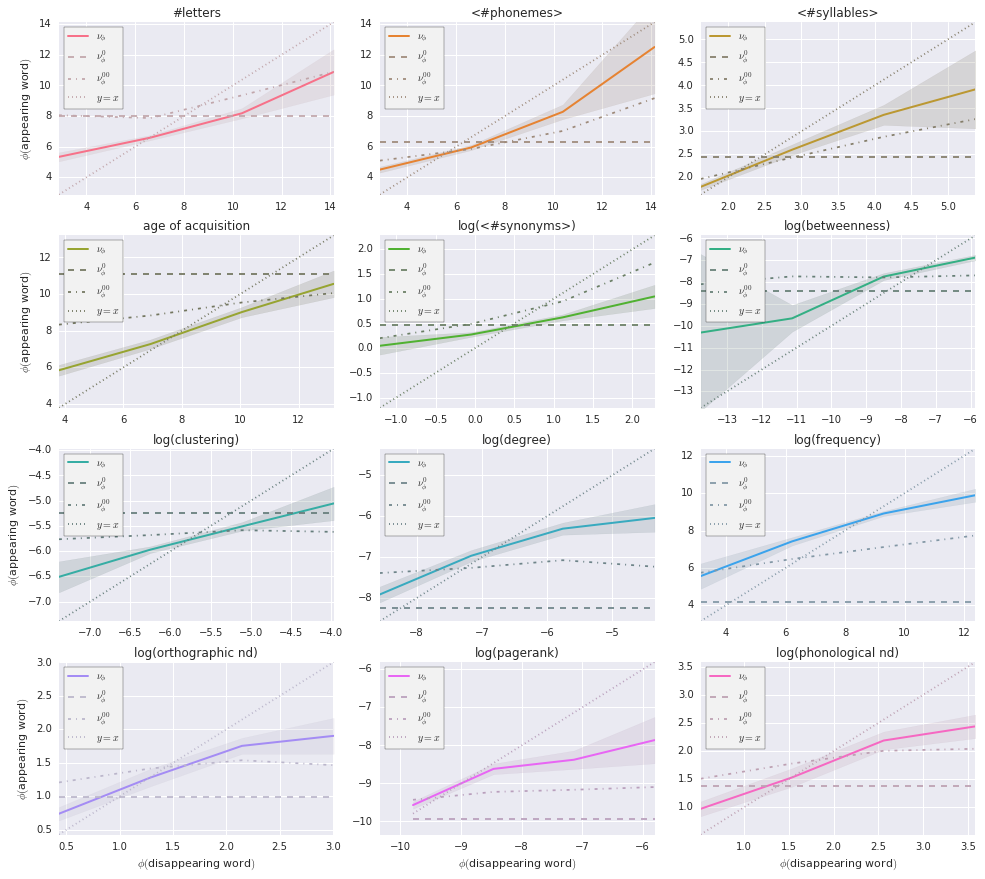

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

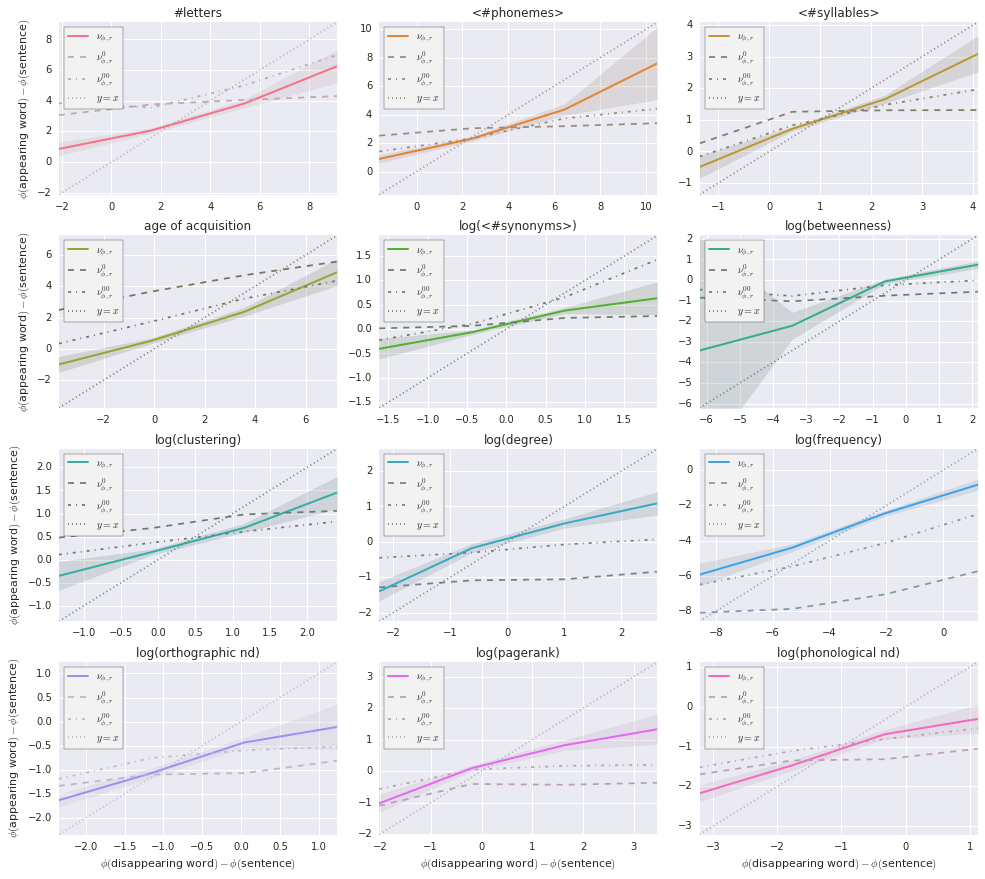

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

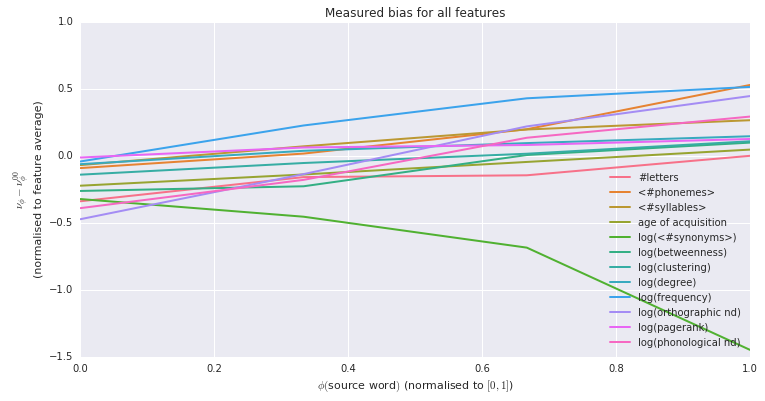

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

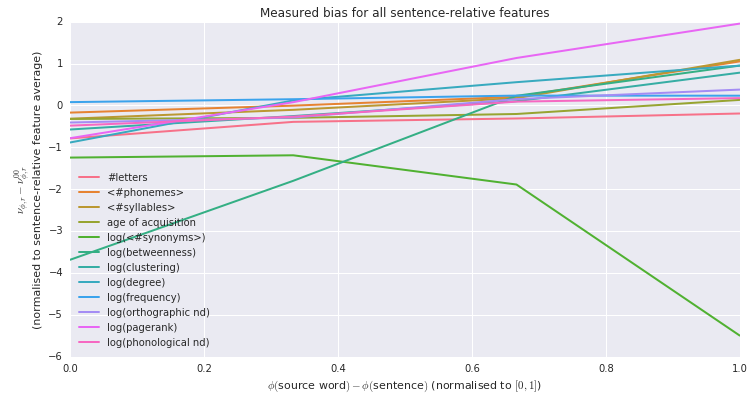

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

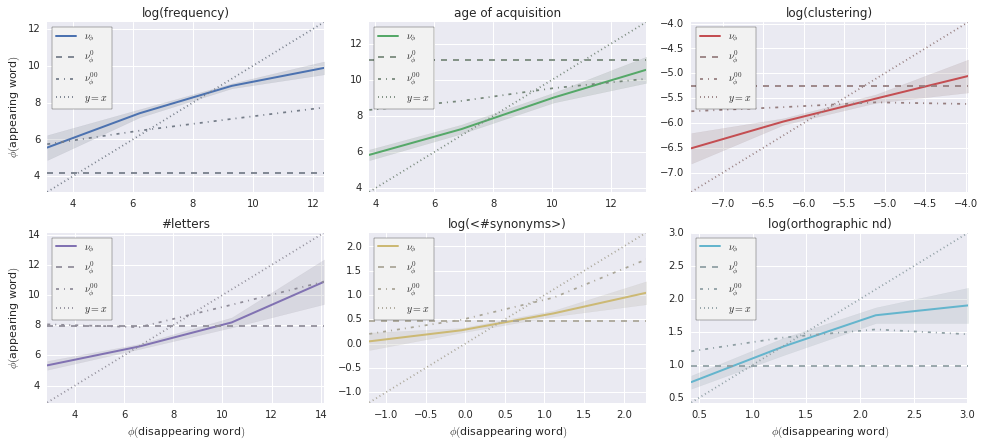

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

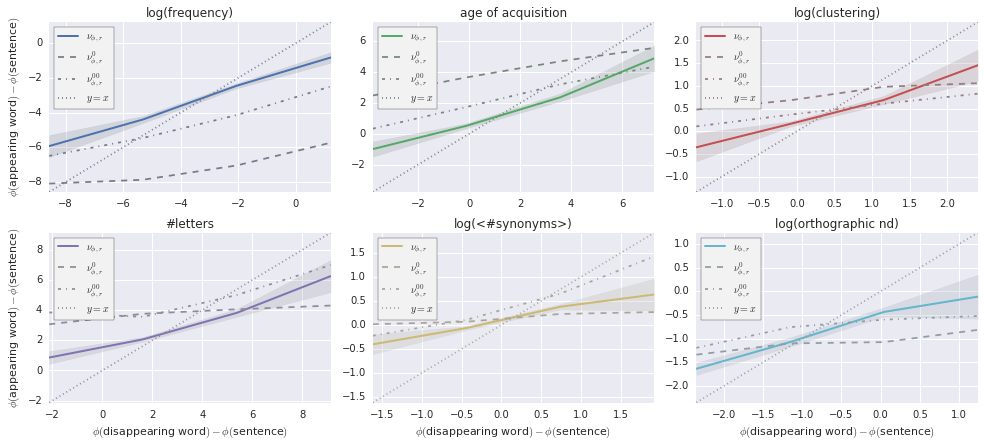

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

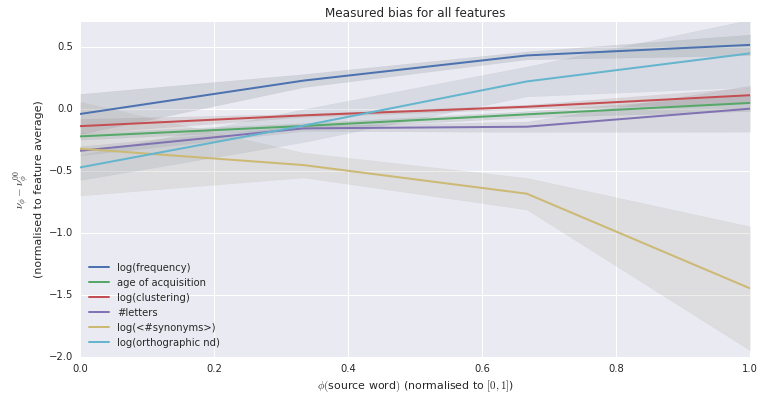

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

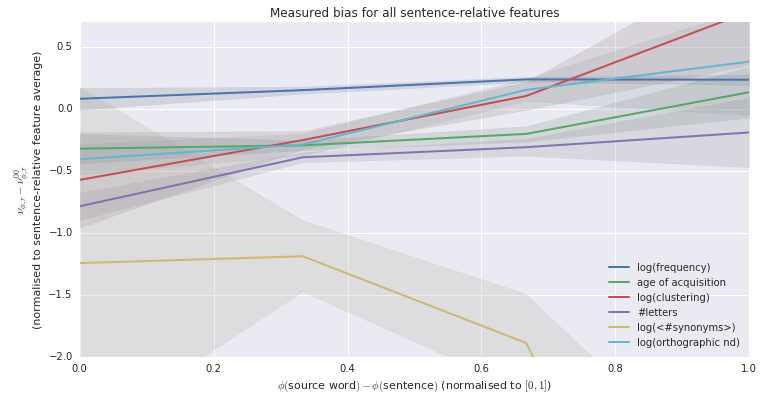

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


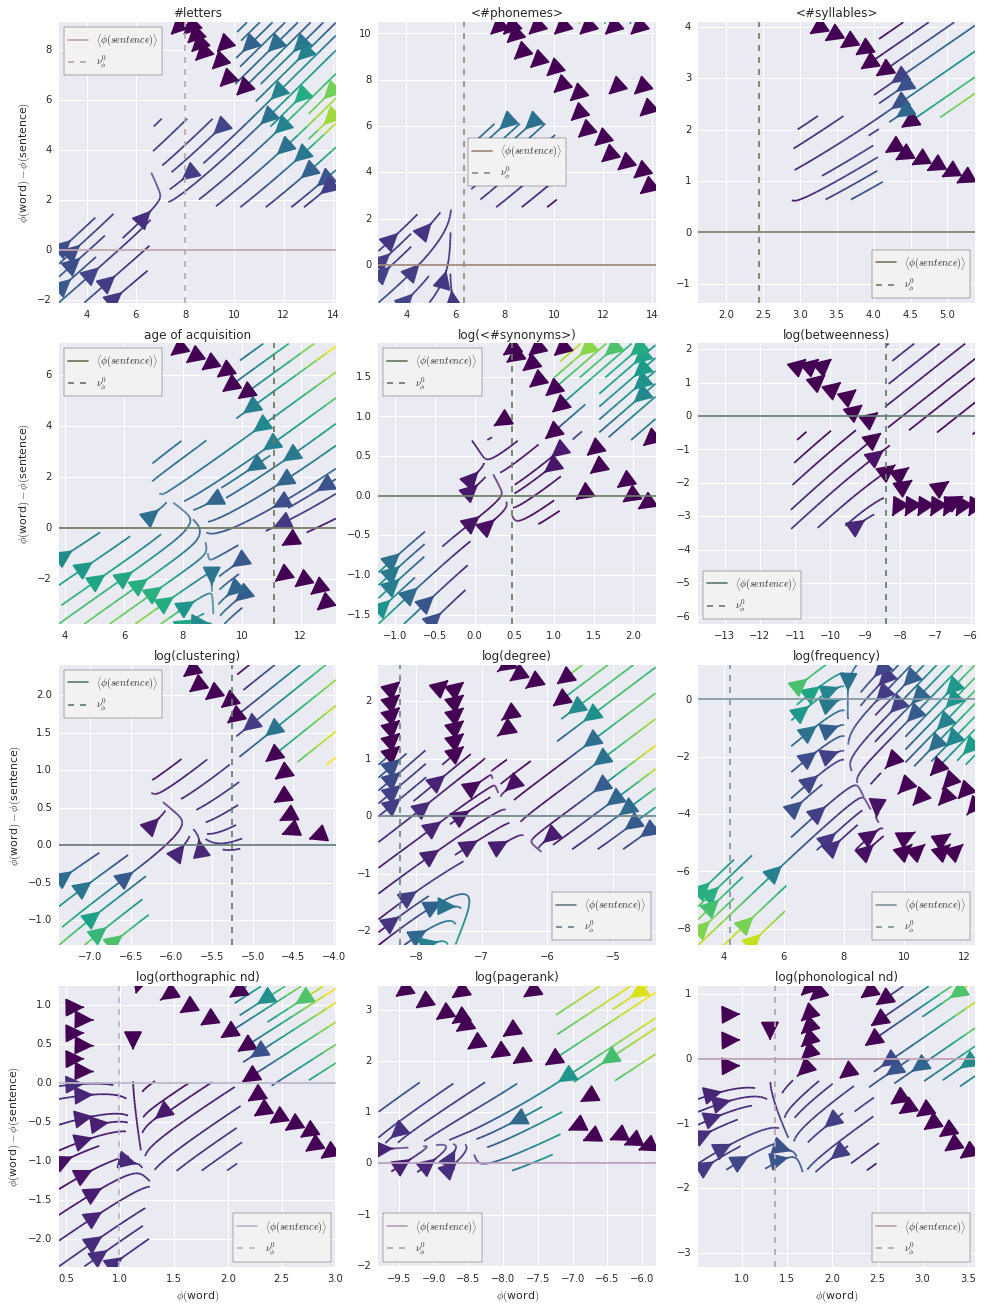

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


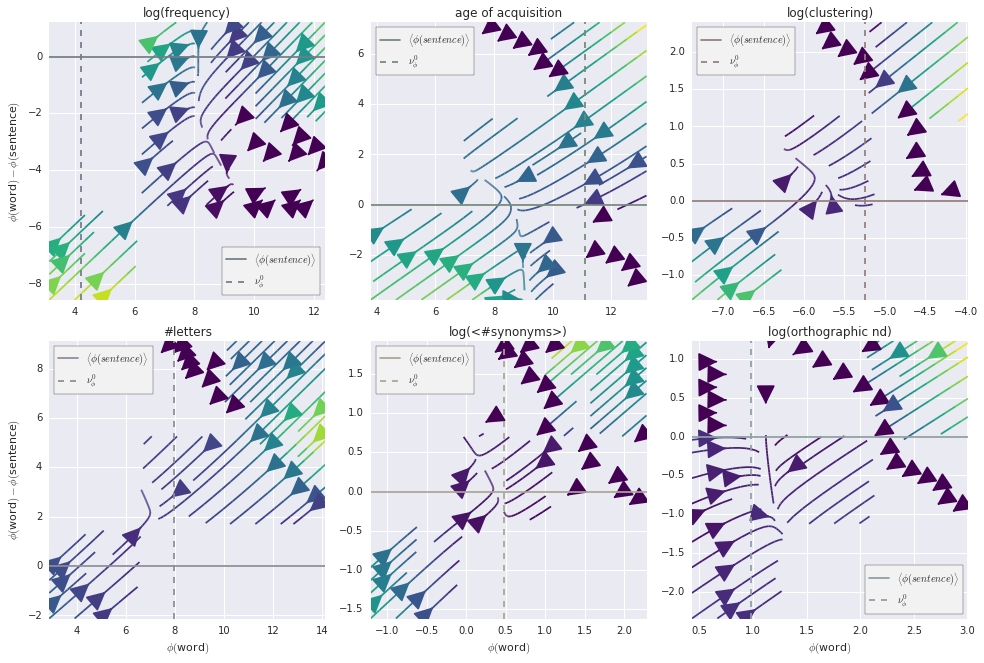

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.51847356  0.1869835   0.08342886  0.07183583  0.03633118  0.0277305
  0.02050678  0.01877744  0.01458835  0.00931506  0.00692079]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.521493,-0.220219,0.070318,-0.211910,-0.212119,0.444170,-0.212401,-0.239638,0.415735,-0.286522,0.173041,0.001508
Component-1,0.418342,-0.343342,0.119129,-0.300114,-0.241547,-0.416215,0.130282,-0.285729,-0.453256,0.193570,-0.168020,0.038864
Component-2,0.467339,0.633026,-0.089077,0.256339,-0.469370,-0.092057,-0.000166,0.264800,-0.038255,0.053747,-0.043952,-0.045195


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 44026) |           | Elapsed Time: 0:00:47 ETA:  24 days, 3:15:59

  0% (   99 of 44026) |                    | Elapsed Time: 0:00:48 ETA:  0:06:44

  0% (  186 of 44026) |                    | Elapsed Time: 0:00:49 ETA:  0:07:09

  0% (  280 of 44026) |                    | Elapsed Time: 0:00:50 ETA:  0:07:06

  0% (  378 of 44026) |                    | Elapsed Time: 0:00:51 ETA:  0:06:58

  1% (  479 of 44026) |                    | Elapsed Time: 0:00:52 ETA:  0:06:50

  1% (  551 of 44026) |                    | Elapsed Time: 0:00:53 ETA:  0:06:47

  1% (  650 of 44026) |                    | Elapsed Time: 0:00:54 ETA:  0:06:44

  1% (  752 of 44026) |                    | Elapsed Time: 0:00:55 ETA:  0:06:40

  1% (  863 of 44026) |                    | Elapsed Time: 0:00:56 ETA:  0:06:32

  2% (  970 of 44026) |                    | Elapsed Time: 0:00:57 ETA:  0:06:26

  2% ( 1076 of 44026) |                    | Elapsed Time: 0:00:58 ETA:  0:06:15

  2% ( 1101 of 44026) |                    | Elapsed Time: 0:00:58 ETA:  0:06:10

  2% ( 1196 of 44026) |                    | Elapsed Time: 0:00:59 ETA:  0:06:11

  2% ( 1307 of 44026) |                    | Elapsed Time: 0:01:00 ETA:  0:06:05

  3% ( 1425 of 44026) |                    | Elapsed Time: 0:01:01 ETA:  0:05:55

  3% ( 1510 of 44026) |                    | Elapsed Time: 0:01:02 ETA:  0:06:01

  3% ( 1569 of 44026) |                    | Elapsed Time: 0:01:03 ETA:  0:06:23

  3% ( 1623 of 44026) |                    | Elapsed Time: 0:01:04 ETA:  0:06:55

  3% ( 1651 of 44026) |                    | Elapsed Time: 0:01:04 ETA:  0:07:19

  3% ( 1706 of 44026) |                    | Elapsed Time: 0:01:05 ETA:  0:08:00

  4% ( 1763 of 44026) |                    | Elapsed Time: 0:01:06 ETA:  0:08:24

  4% ( 1820 of 44026) |                    | Elapsed Time: 0:01:07 ETA:  0:08:58

  4% ( 1883 of 44026) |                    | Elapsed Time: 0:01:09 ETA:  0:09:48

  4% ( 1956 of 44026) |                    | Elapsed Time: 0:01:10 ETA:  0:10:43

  4% ( 2070 of 44026) |                    | Elapsed Time: 0:01:11 ETA:  0:10:05

  5% ( 2202 of 44026) |#                   | Elapsed Time: 0:01:12 ETA:  0:08:37

  5% ( 2314 of 44026) |#                   | Elapsed Time: 0:01:13 ETA:  0:07:53

  5% ( 2419 of 44026) |#                   | Elapsed Time: 0:01:14 ETA:  0:07:13

  5% ( 2525 of 44026) |#                   | Elapsed Time: 0:01:15 ETA:  0:06:39

  5% ( 2639 of 44026) |#                   | Elapsed Time: 0:01:16 ETA:  0:06:05

  6% ( 2752 of 44026) |#                   | Elapsed Time: 0:01:17 ETA:  0:05:38

  6% ( 2861 of 44026) |#                   | Elapsed Time: 0:01:18 ETA:  0:05:20

  6% ( 2974 of 44026) |#                   | Elapsed Time: 0:01:19 ETA:  0:05:20

  6% ( 3067 of 44026) |#                   | Elapsed Time: 0:01:20 ETA:  0:05:27

  7% ( 3173 of 44026) |#                   | Elapsed Time: 0:01:21 ETA:  0:05:28

  7% ( 3302 of 44026) |#                   | Elapsed Time: 0:01:22 ETA:  0:05:24

  7% ( 3409 of 44026) |#                   | Elapsed Time: 0:01:23 ETA:  0:05:23

  7% ( 3492 of 44026) |#                   | Elapsed Time: 0:01:24 ETA:  0:05:37

  8% ( 3575 of 44026) |#                   | Elapsed Time: 0:01:25 ETA:  0:05:51

  8% ( 3639 of 44026) |#                   | Elapsed Time: 0:01:26 ETA:  0:06:16

  8% ( 3685 of 44026) |#                   | Elapsed Time: 0:01:27 ETA:  0:07:00

  8% ( 3803 of 44026) |#                   | Elapsed Time: 0:01:28 ETA:  0:06:41

  8% ( 3853 of 44026) |#                   | Elapsed Time: 0:01:28 ETA:  0:06:47

  8% ( 3960 of 44026) |#                   | Elapsed Time: 0:01:29 ETA:  0:06:52

  9% ( 4070 of 44026) |#                   | Elapsed Time: 0:01:30 ETA:  0:06:38

  9% ( 4176 of 44026) |#                   | Elapsed Time: 0:01:31 ETA:  0:06:37

  9% ( 4223 of 44026) |#                   | Elapsed Time: 0:01:32 ETA:  0:07:01

  9% ( 4272 of 44026) |#                   | Elapsed Time: 0:01:33 ETA:  0:07:25

  9% ( 4344 of 44026) |#                   | Elapsed Time: 0:01:34 ETA:  0:07:17

 10% ( 4403 of 44026) |##                  | Elapsed Time: 0:01:35 ETA:  0:06:41

 10% ( 4490 of 44026) |##                  | Elapsed Time: 0:01:36 ETA:  0:07:03

 10% ( 4570 of 44026) |##                  | Elapsed Time: 0:01:37 ETA:  0:07:13

 10% ( 4659 of 44026) |##                  | Elapsed Time: 0:01:38 ETA:  0:07:26

 10% ( 4784 of 44026) |##                  | Elapsed Time: 0:01:39 ETA:  0:07:13

 11% ( 4880 of 44026) |##                  | Elapsed Time: 0:01:40 ETA:  0:07:20

 11% ( 4953 of 44026) |##                  | Elapsed Time: 0:01:41 ETA:  0:06:59

 11% ( 5030 of 44026) |##                  | Elapsed Time: 0:01:42 ETA:  0:06:39

 11% ( 5110 of 44026) |##                  | Elapsed Time: 0:01:43 ETA:  0:06:33

 11% ( 5186 of 44026) |##                  | Elapsed Time: 0:01:44 ETA:  0:06:44

 11% ( 5266 of 44026) |##                  | Elapsed Time: 0:01:45 ETA:  0:06:48

 12% ( 5347 of 44026) |##                  | Elapsed Time: 0:01:46 ETA:  0:06:46

 12% ( 5430 of 44026) |##                  | Elapsed Time: 0:01:47 ETA:  0:06:49

 12% ( 5504 of 44026) |##                  | Elapsed Time: 0:01:48 ETA:  0:07:19

 12% ( 5592 of 44026) |##                  | Elapsed Time: 0:01:49 ETA:  0:07:25

 12% ( 5679 of 44026) |##                  | Elapsed Time: 0:01:50 ETA:  0:07:13

 13% ( 5764 of 44026) |##                  | Elapsed Time: 0:01:51 ETA:  0:07:07

 13% ( 5842 of 44026) |##                  | Elapsed Time: 0:01:52 ETA:  0:07:07

 13% ( 5922 of 44026) |##                  | Elapsed Time: 0:01:53 ETA:  0:07:03

 13% ( 6005 of 44026) |##                  | Elapsed Time: 0:01:54 ETA:  0:07:00

 13% ( 6054 of 44026) |##                  | Elapsed Time: 0:01:55 ETA:  0:06:59

 13% ( 6139 of 44026) |##                  | Elapsed Time: 0:01:56 ETA:  0:06:56

 14% ( 6228 of 44026) |##                  | Elapsed Time: 0:01:57 ETA:  0:06:50

 14% ( 6313 of 44026) |##                  | Elapsed Time: 0:01:58 ETA:  0:06:50

 14% ( 6398 of 44026) |##                  | Elapsed Time: 0:01:59 ETA:  0:06:50

 14% ( 6478 of 44026) |##                  | Elapsed Time: 0:02:00 ETA:  0:06:53

 14% ( 6557 of 44026) |##                  | Elapsed Time: 0:02:01 ETA:  0:06:51

 15% ( 6604 of 44026) |###                 | Elapsed Time: 0:02:01 ETA:  0:06:50

 15% ( 6684 of 44026) |###                 | Elapsed Time: 0:02:02 ETA:  0:06:51

 15% ( 6773 of 44026) |###                 | Elapsed Time: 0:02:03 ETA:  0:06:46

 15% ( 6866 of 44026) |###                 | Elapsed Time: 0:02:04 ETA:  0:06:39

 15% ( 6971 of 44026) |###                 | Elapsed Time: 0:02:05 ETA:  0:06:26

 16% ( 7061 of 44026) |###                 | Elapsed Time: 0:02:06 ETA:  0:06:22

 16% ( 7155 of 44026) |###                 | Elapsed Time: 0:02:07 ETA:  0:06:09

 16% ( 7258 of 44026) |###                 | Elapsed Time: 0:02:08 ETA:  0:05:54

 16% ( 7358 of 44026) |###                 | Elapsed Time: 0:02:09 ETA:  0:05:40

 16% ( 7461 of 44026) |###                 | Elapsed Time: 0:02:10 ETA:  0:05:29

 17% ( 7565 of 44026) |###                 | Elapsed Time: 0:02:11 ETA:  0:05:16

 17% ( 7670 of 44026) |###                 | Elapsed Time: 0:02:12 ETA:  0:05:06

 17% ( 7705 of 44026) |###                 | Elapsed Time: 0:02:13 ETA:  0:05:00

 17% ( 7794 of 44026) |###                 | Elapsed Time: 0:02:14 ETA:  0:05:08

 17% ( 7879 of 44026) |###                 | Elapsed Time: 0:02:15 ETA:  0:05:11

 18% ( 7973 of 44026) |###                 | Elapsed Time: 0:02:16 ETA:  0:05:15

 18% ( 8060 of 44026) |###                 | Elapsed Time: 0:02:17 ETA:  0:05:23

 18% ( 8144 of 44026) |###                 | Elapsed Time: 0:02:18 ETA:  0:05:31

 18% ( 8255 of 44026) |###                 | Elapsed Time: 0:02:19 ETA:  0:05:39

 18% ( 8340 of 44026) |###                 | Elapsed Time: 0:02:20 ETA:  0:05:52

 19% ( 8428 of 44026) |###                 | Elapsed Time: 0:02:21 ETA:  0:05:57

 19% ( 8528 of 44026) |###                 | Elapsed Time: 0:02:22 ETA:  0:05:48

 19% ( 8621 of 44026) |###                 | Elapsed Time: 0:02:23 ETA:  0:05:41

 19% ( 8721 of 44026) |###                 | Elapsed Time: 0:02:24 ETA:  0:05:36

 20% ( 8806 of 44026) |####                | Elapsed Time: 0:02:25 ETA:  0:05:34

 20% ( 8896 of 44026) |####                | Elapsed Time: 0:02:26 ETA:  0:05:29

 20% ( 8996 of 44026) |####                | Elapsed Time: 0:02:27 ETA:  0:05:27

 20% ( 9098 of 44026) |####                | Elapsed Time: 0:02:28 ETA:  0:05:22

 20% ( 9195 of 44026) |####                | Elapsed Time: 0:02:29 ETA:  0:05:14

 21% ( 9294 of 44026) |####                | Elapsed Time: 0:02:30 ETA:  0:05:07

 21% ( 9356 of 44026) |####                | Elapsed Time: 0:02:30 ETA:  0:05:05

 21% ( 9456 of 44026) |####                | Elapsed Time: 0:02:31 ETA:  0:05:00

 21% ( 9561 of 44026) |####                | Elapsed Time: 0:02:32 ETA:  0:04:57

 21% ( 9659 of 44026) |####                | Elapsed Time: 0:02:33 ETA:  0:04:50

 22% ( 9764 of 44026) |####                | Elapsed Time: 0:02:34 ETA:  0:04:42

 22% ( 9871 of 44026) |####                | Elapsed Time: 0:02:35 ETA:  0:04:37

 22% ( 9906 of 44026) |####                | Elapsed Time: 0:02:36 ETA:  0:04:36

 22% (10007 of 44026) |####                | Elapsed Time: 0:02:37 ETA:  0:04:32

 22% (10105 of 44026) |####                | Elapsed Time: 0:02:38 ETA:  0:04:32

 23% (10208 of 44026) |####                | Elapsed Time: 0:02:39 ETA:  0:04:32

 23% (10295 of 44026) |####                | Elapsed Time: 0:02:40 ETA:  0:04:38

 23% (10397 of 44026) |####                | Elapsed Time: 0:02:41 ETA:  0:04:38

 23% (10457 of 44026) |####                | Elapsed Time: 0:02:41 ETA:  0:04:37

 24% (10572 of 44026) |####                | Elapsed Time: 0:02:42 ETA:  0:04:31

 24% (10695 of 44026) |####                | Elapsed Time: 0:02:43 ETA:  0:04:21

 24% (10812 of 44026) |####                | Elapsed Time: 0:02:44 ETA:  0:04:15

 24% (10929 of 44026) |####                | Elapsed Time: 0:02:45 ETA:  0:04:07

 25% (11007 of 44026) |#####               | Elapsed Time: 0:02:46 ETA:  0:03:59

 25% (11139 of 44026) |#####               | Elapsed Time: 0:02:47 ETA:  0:03:45

 25% (11274 of 44026) |#####               | Elapsed Time: 0:02:48 ETA:  0:03:25

 25% (11402 of 44026) |#####               | Elapsed Time: 0:02:49 ETA:  0:03:14

 26% (11483 of 44026) |#####               | Elapsed Time: 0:02:50 ETA:  0:03:22

 26% (11557 of 44026) |#####               | Elapsed Time: 0:02:51 ETA:  0:03:33

 26% (11634 of 44026) |#####               | Elapsed Time: 0:02:52 ETA:  0:03:51

 26% (11713 of 44026) |#####               | Elapsed Time: 0:02:53 ETA:  0:04:07

 26% (11808 of 44026) |#####               | Elapsed Time: 0:02:54 ETA:  0:04:17

 27% (11921 of 44026) |#####               | Elapsed Time: 0:02:55 ETA:  0:04:15

 27% (12030 of 44026) |#####               | Elapsed Time: 0:02:56 ETA:  0:04:25

 27% (12108 of 44026) |#####               | Elapsed Time: 0:02:57 ETA:  0:04:48

 27% (12209 of 44026) |#####               | Elapsed Time: 0:02:58 ETA:  0:05:02

 27% (12298 of 44026) |#####               | Elapsed Time: 0:02:59 ETA:  0:04:56

 28% (12397 of 44026) |#####               | Elapsed Time: 0:03:00 ETA:  0:04:46

 28% (12494 of 44026) |#####               | Elapsed Time: 0:03:01 ETA:  0:04:34

 28% (12582 of 44026) |#####               | Elapsed Time: 0:03:02 ETA:  0:04:28

 28% (12658 of 44026) |#####               | Elapsed Time: 0:03:03 ETA:  0:04:31

 28% (12747 of 44026) |#####               | Elapsed Time: 0:03:04 ETA:  0:04:44

 29% (12850 of 44026) |#####               | Elapsed Time: 0:03:05 ETA:  0:04:46

 29% (12954 of 44026) |#####               | Elapsed Time: 0:03:06 ETA:  0:04:38

 29% (13057 of 44026) |#####               | Elapsed Time: 0:03:07 ETA:  0:04:35

 29% (13155 of 44026) |#####               | Elapsed Time: 0:03:08 ETA:  0:04:30

 30% (13208 of 44026) |######              | Elapsed Time: 0:03:08 ETA:  0:04:33

 30% (13322 of 44026) |######              | Elapsed Time: 0:03:09 ETA:  0:04:22

 30% (13427 of 44026) |######              | Elapsed Time: 0:03:10 ETA:  0:04:12

 30% (13534 of 44026) |######              | Elapsed Time: 0:03:11 ETA:  0:04:02

 30% (13639 of 44026) |######              | Elapsed Time: 0:03:12 ETA:  0:03:53

 31% (13759 of 44026) |######              | Elapsed Time: 0:03:14 ETA:  0:03:52

 31% (13864 of 44026) |######              | Elapsed Time: 0:03:15 ETA:  0:03:51

 31% (13973 of 44026) |######              | Elapsed Time: 0:03:16 ETA:  0:03:44

 31% (14074 of 44026) |######              | Elapsed Time: 0:03:17 ETA:  0:03:40

 32% (14191 of 44026) |######              | Elapsed Time: 0:03:18 ETA:  0:03:38

 32% (14309 of 44026) |######              | Elapsed Time: 0:03:19 ETA:  0:03:28

 32% (14433 of 44026) |######              | Elapsed Time: 0:03:20 ETA:  0:03:20

 33% (14557 of 44026) |######              | Elapsed Time: 0:03:21 ETA:  0:03:10

 33% (14691 of 44026) |######              | Elapsed Time: 0:03:22 ETA:  0:02:55

 33% (14830 of 44026) |######              | Elapsed Time: 0:03:23 ETA:  0:02:46

 33% (14859 of 44026) |######              | Elapsed Time: 0:03:23 ETA:  0:02:39

 34% (14985 of 44026) |######              | Elapsed Time: 0:03:24 ETA:  0:02:32

 34% (15118 of 44026) |######              | Elapsed Time: 0:03:25 ETA:  0:02:20

 34% (15245 of 44026) |######              | Elapsed Time: 0:03:26 ETA:  0:02:15

 34% (15363 of 44026) |######              | Elapsed Time: 0:03:27 ETA:  0:02:16

 35% (15410 of 44026) |#######             | Elapsed Time: 0:03:27 ETA:  0:02:17

 35% (15492 of 44026) |#######             | Elapsed Time: 0:03:28 ETA:  0:02:32

 35% (15560 of 44026) |#######             | Elapsed Time: 0:03:29 ETA:  0:02:58

 35% (15654 of 44026) |#######             | Elapsed Time: 0:03:30 ETA:  0:03:18

 35% (15737 of 44026) |#######             | Elapsed Time: 0:03:31 ETA:  0:03:32

 35% (15819 of 44026) |#######             | Elapsed Time: 0:03:32 ETA:  0:03:54

 36% (15900 of 44026) |#######             | Elapsed Time: 0:03:33 ETA:  0:04:22

 36% (15960 of 44026) |#######             | Elapsed Time: 0:03:34 ETA:  0:04:53

 36% (16062 of 44026) |#######             | Elapsed Time: 0:03:35 ETA:  0:05:03

 36% (16156 of 44026) |#######             | Elapsed Time: 0:03:36 ETA:  0:05:03

 36% (16240 of 44026) |#######             | Elapsed Time: 0:03:37 ETA:  0:05:01

 37% (16350 of 44026) |#######             | Elapsed Time: 0:03:38 ETA:  0:04:32

 37% (16468 of 44026) |#######             | Elapsed Time: 0:03:39 ETA:  0:04:17

 37% (16510 of 44026) |#######             | Elapsed Time: 0:03:39 ETA:  0:04:03

 37% (16603 of 44026) |#######             | Elapsed Time: 0:03:40 ETA:  0:03:57

 37% (16654 of 44026) |#######             | Elapsed Time: 0:03:41 ETA:  0:04:14

 38% (16751 of 44026) |#######             | Elapsed Time: 0:03:42 ETA:  0:04:03

 38% (16880 of 44026) |#######             | Elapsed Time: 0:03:43 ETA:  0:03:47

 38% (16987 of 44026) |#######             | Elapsed Time: 0:03:44 ETA:  0:03:39

 38% (17061 of 44026) |#######             | Elapsed Time: 0:03:45 ETA:  0:03:37

 38% (17148 of 44026) |#######             | Elapsed Time: 0:03:46 ETA:  0:03:48

 39% (17245 of 44026) |#######             | Elapsed Time: 0:03:47 ETA:  0:04:00

 39% (17357 of 44026) |#######             | Elapsed Time: 0:03:48 ETA:  0:03:55

 39% (17487 of 44026) |#######             | Elapsed Time: 0:03:49 ETA:  0:03:34

 40% (17611 of 44026) |########            | Elapsed Time: 0:03:50 ETA:  0:02:54

 40% (17717 of 44026) |########            | Elapsed Time: 0:03:51 ETA:  0:03:05

 40% (17801 of 44026) |########            | Elapsed Time: 0:03:52 ETA:  0:03:15

 40% (17902 of 44026) |########            | Elapsed Time: 0:03:53 ETA:  0:03:07

 40% (18014 of 44026) |########            | Elapsed Time: 0:03:54 ETA:  0:02:54

 41% (18128 of 44026) |########            | Elapsed Time: 0:03:55 ETA:  0:02:45

 41% (18161 of 44026) |########            | Elapsed Time: 0:03:56 ETA:  0:02:45

 41% (18262 of 44026) |########            | Elapsed Time: 0:03:57 ETA:  0:02:59

 41% (18368 of 44026) |########            | Elapsed Time: 0:03:58 ETA:  0:03:07

 42% (18499 of 44026) |########            | Elapsed Time: 0:03:59 ETA:  0:02:53

 42% (18604 of 44026) |########            | Elapsed Time: 0:04:00 ETA:  0:02:52

 42% (18684 of 44026) |########            | Elapsed Time: 0:04:01 ETA:  0:02:53

 42% (18712 of 44026) |########            | Elapsed Time: 0:04:01 ETA:  0:02:55

 42% (18796 of 44026) |########            | Elapsed Time: 0:04:02 ETA:  0:03:09

 42% (18893 of 44026) |########            | Elapsed Time: 0:04:03 ETA:  0:03:17

 43% (19000 of 44026) |########            | Elapsed Time: 0:04:04 ETA:  0:03:15

 43% (19109 of 44026) |########            | Elapsed Time: 0:04:05 ETA:  0:03:09

 43% (19220 of 44026) |########            | Elapsed Time: 0:04:06 ETA:  0:03:06

 43% (19262 of 44026) |########            | Elapsed Time: 0:04:06 ETA:  0:03:20

 44% (19375 of 44026) |########            | Elapsed Time: 0:04:07 ETA:  0:03:14

 44% (19490 of 44026) |########            | Elapsed Time: 0:04:08 ETA:  0:02:54

 44% (19594 of 44026) |########            | Elapsed Time: 0:04:09 ETA:  0:02:49

 44% (19708 of 44026) |########            | Elapsed Time: 0:04:10 ETA:  0:02:34

 45% (19812 of 44026) |#########           | Elapsed Time: 0:04:11 ETA:  0:02:28

 45% (19926 of 44026) |#########           | Elapsed Time: 0:04:12 ETA:  0:02:24

 45% (20035 of 44026) |#########           | Elapsed Time: 0:04:13 ETA:  0:02:24

 45% (20147 of 44026) |#########           | Elapsed Time: 0:04:14 ETA:  0:02:22

 46% (20261 of 44026) |#########           | Elapsed Time: 0:04:15 ETA:  0:02:20

 46% (20363 of 44026) |#########           | Elapsed Time: 0:04:16 ETA:  0:02:18

 46% (20468 of 44026) |#########           | Elapsed Time: 0:04:17 ETA:  0:02:21

 46% (20567 of 44026) |#########           | Elapsed Time: 0:04:18 ETA:  0:02:22

 46% (20664 of 44026) |#########           | Elapsed Time: 0:04:19 ETA:  0:02:28

 47% (20776 of 44026) |#########           | Elapsed Time: 0:04:20 ETA:  0:02:26

 47% (20872 of 44026) |#########           | Elapsed Time: 0:04:21 ETA:  0:02:32

 47% (20913 of 44026) |#########           | Elapsed Time: 0:04:22 ETA:  0:02:40

 47% (20999 of 44026) |#########           | Elapsed Time: 0:04:23 ETA:  0:02:52

 47% (21083 of 44026) |#########           | Elapsed Time: 0:04:24 ETA:  0:03:08

 48% (21178 of 44026) |#########           | Elapsed Time: 0:04:25 ETA:  0:03:18

 48% (21239 of 44026) |#########           | Elapsed Time: 0:04:26 ETA:  0:03:43

 48% (21344 of 44026) |#########           | Elapsed Time: 0:04:27 ETA:  0:03:39

 48% (21463 of 44026) |#########           | Elapsed Time: 0:04:28 ETA:  0:03:49

 48% (21550 of 44026) |#########           | Elapsed Time: 0:04:29 ETA:  0:03:55

 49% (21644 of 44026) |#########           | Elapsed Time: 0:04:30 ETA:  0:03:45

 49% (21749 of 44026) |#########           | Elapsed Time: 0:04:31 ETA:  0:03:31

 49% (21817 of 44026) |#########           | Elapsed Time: 0:04:32 ETA:  0:03:41

 49% (21896 of 44026) |#########           | Elapsed Time: 0:04:33 ETA:  0:03:50

 49% (21973 of 44026) |#########           | Elapsed Time: 0:04:34 ETA:  0:03:38

 50% (22014 of 44026) |##########          | Elapsed Time: 0:04:35 ETA:  0:03:49

 50% (22117 of 44026) |##########          | Elapsed Time: 0:04:36 ETA:  0:03:46

 50% (22219 of 44026) |##########          | Elapsed Time: 0:04:37 ETA:  0:03:38

 50% (22316 of 44026) |##########          | Elapsed Time: 0:04:38 ETA:  0:03:31

 50% (22402 of 44026) |##########          | Elapsed Time: 0:04:39 ETA:  0:03:35

 51% (22498 of 44026) |##########          | Elapsed Time: 0:04:40 ETA:  0:03:40

 51% (22564 of 44026) |##########          | Elapsed Time: 0:04:40 ETA:  0:03:17

 51% (22672 of 44026) |##########          | Elapsed Time: 0:04:41 ETA:  0:02:58

 51% (22780 of 44026) |##########          | Elapsed Time: 0:04:42 ETA:  0:02:39

 52% (22898 of 44026) |##########          | Elapsed Time: 0:04:43 ETA:  0:02:26

 52% (22994 of 44026) |##########          | Elapsed Time: 0:04:44 ETA:  0:02:28

 52% (23114 of 44026) |##########          | Elapsed Time: 0:04:45 ETA:  0:02:25

 52% (23206 of 44026) |##########          | Elapsed Time: 0:04:46 ETA:  0:02:21

 52% (23305 of 44026) |##########          | Elapsed Time: 0:04:47 ETA:  0:02:19

 53% (23443 of 44026) |##########          | Elapsed Time: 0:04:48 ETA:  0:02:03

 53% (23547 of 44026) |##########          | Elapsed Time: 0:04:49 ETA:  0:02:04

 53% (23664 of 44026) |##########          | Elapsed Time: 0:04:51 ETA:  0:02:14

 53% (23762 of 44026) |##########          | Elapsed Time: 0:04:52 ETA:  0:02:12

 54% (23860 of 44026) |##########          | Elapsed Time: 0:04:53 ETA:  0:02:11

 54% (23963 of 44026) |##########          | Elapsed Time: 0:04:54 ETA:  0:02:11

 54% (24084 of 44026) |##########          | Elapsed Time: 0:04:55 ETA:  0:01:56

 54% (24185 of 44026) |##########          | Elapsed Time: 0:04:56 ETA:  0:01:55

 55% (24215 of 44026) |###########         | Elapsed Time: 0:04:56 ETA:  0:02:11

 55% (24342 of 44026) |###########         | Elapsed Time: 0:04:57 ETA:  0:01:58

 55% (24458 of 44026) |###########         | Elapsed Time: 0:04:58 ETA:  0:01:49

 55% (24569 of 44026) |###########         | Elapsed Time: 0:04:59 ETA:  0:01:46

 56% (24665 of 44026) |###########         | Elapsed Time: 0:05:00 ETA:  0:01:46

 56% (24739 of 44026) |###########         | Elapsed Time: 0:05:01 ETA:  0:01:56

 56% (24765 of 44026) |###########         | Elapsed Time: 0:05:01 ETA:  0:02:03

 56% (24867 of 44026) |###########         | Elapsed Time: 0:05:02 ETA:  0:02:12

 56% (24987 of 44026) |###########         | Elapsed Time: 0:05:03 ETA:  0:02:00

 57% (25103 of 44026) |###########         | Elapsed Time: 0:05:04 ETA:  0:01:53

 57% (25231 of 44026) |###########         | Elapsed Time: 0:05:05 ETA:  0:01:51

 57% (25315 of 44026) |###########         | Elapsed Time: 0:05:06 ETA:  0:01:47

 57% (25447 of 44026) |###########         | Elapsed Time: 0:05:07 ETA:  0:01:36

 58% (25571 of 44026) |###########         | Elapsed Time: 0:05:08 ETA:  0:01:23

 58% (25676 of 44026) |###########         | Elapsed Time: 0:05:09 ETA:  0:01:09

 58% (25771 of 44026) |###########         | Elapsed Time: 0:05:10 ETA:  0:01:09

 58% (25866 of 44026) |###########         | Elapsed Time: 0:05:11 ETA:  0:01:10

 58% (25972 of 44026) |###########         | Elapsed Time: 0:05:12 ETA:  0:01:14

 59% (26083 of 44026) |###########         | Elapsed Time: 0:05:13 ETA:  0:01:15

 59% (26180 of 44026) |###########         | Elapsed Time: 0:05:14 ETA:  0:01:27

 59% (26299 of 44026) |###########         | Elapsed Time: 0:05:15 ETA:  0:01:28

 60% (26416 of 44026) |############        | Elapsed Time: 0:05:16 ETA:  0:01:31

 60% (26525 of 44026) |############        | Elapsed Time: 0:05:17 ETA:  0:01:36

 60% (26637 of 44026) |############        | Elapsed Time: 0:05:18 ETA:  0:01:32

 60% (26738 of 44026) |############        | Elapsed Time: 0:05:19 ETA:  0:01:28

 60% (26853 of 44026) |############        | Elapsed Time: 0:05:20 ETA:  0:01:20

 61% (26966 of 44026) |############        | Elapsed Time: 0:05:21 ETA:  0:01:15

 61% (27067 of 44026) |############        | Elapsed Time: 0:05:22 ETA:  0:01:18

 61% (27187 of 44026) |############        | Elapsed Time: 0:05:23 ETA:  0:01:08

 61% (27283 of 44026) |############        | Elapsed Time: 0:05:24 ETA:  0:01:16

 62% (27390 of 44026) |############        | Elapsed Time: 0:05:25 ETA:  0:01:22

 62% (27488 of 44026) |############        | Elapsed Time: 0:05:26 ETA:  0:01:26

 62% (27517 of 44026) |############        | Elapsed Time: 0:05:26 ETA:  0:01:28

 62% (27611 of 44026) |############        | Elapsed Time: 0:05:27 ETA:  0:01:31

 62% (27697 of 44026) |############        | Elapsed Time: 0:05:28 ETA:  0:01:44

 63% (27831 of 44026) |############        | Elapsed Time: 0:05:29 ETA:  0:01:33

 63% (27959 of 44026) |############        | Elapsed Time: 0:05:30 ETA:  0:01:20

 63% (28067 of 44026) |############        | Elapsed Time: 0:05:31 ETA:  0:01:24

 64% (28189 of 44026) |############        | Elapsed Time: 0:05:32 ETA:  0:01:15

 64% (28283 of 44026) |############        | Elapsed Time: 0:05:33 ETA:  0:01:15

 64% (28398 of 44026) |############        | Elapsed Time: 0:05:34 ETA:  0:01:11

 64% (28494 of 44026) |############        | Elapsed Time: 0:05:35 ETA:  0:01:09

 65% (28617 of 44026) |#############       | Elapsed Time: 0:05:37 ETA:  0:01:09

 65% (28690 of 44026) |#############       | Elapsed Time: 0:05:38 ETA:  0:01:38

 65% (28758 of 44026) |#############       | Elapsed Time: 0:05:39 ETA:  0:01:57

 65% (28865 of 44026) |#############       | Elapsed Time: 0:05:40 ETA:  0:01:51

 65% (28961 of 44026) |#############       | Elapsed Time: 0:05:41 ETA:  0:02:05

 66% (29069 of 44026) |#############       | Elapsed Time: 0:05:42 ETA:  0:01:56

 66% (29168 of 44026) |#############       | Elapsed Time: 0:05:43 ETA:  0:02:09

 66% (29281 of 44026) |#############       | Elapsed Time: 0:05:44 ETA:  0:02:03

 66% (29400 of 44026) |#############       | Elapsed Time: 0:05:45 ETA:  0:01:51

 67% (29506 of 44026) |#############       | Elapsed Time: 0:05:46 ETA:  0:01:31

 67% (29621 of 44026) |#############       | Elapsed Time: 0:05:47 ETA:  0:01:06

 67% (29718 of 44026) |#############       | Elapsed Time: 0:05:48 ETA:  0:01:01

 67% (29828 of 44026) |#############       | Elapsed Time: 0:05:49 ETA:  0:00:53

 68% (29950 of 44026) |#############       | Elapsed Time: 0:05:50 ETA:  0:00:45

 68% (30064 of 44026) |#############       | Elapsed Time: 0:05:51 ETA:  0:00:35

 68% (30157 of 44026) |#############       | Elapsed Time: 0:05:52 ETA:  0:00:42

 68% (30244 of 44026) |#############       | Elapsed Time: 0:05:53 ETA:  0:00:52

 68% (30268 of 44026) |#############       | Elapsed Time: 0:05:53 ETA:  0:01:00

 68% (30349 of 44026) |#############       | Elapsed Time: 0:05:54 ETA:  0:01:11

 69% (30446 of 44026) |#############       | Elapsed Time: 0:05:55 ETA:  0:01:19

 69% (30554 of 44026) |#############       | Elapsed Time: 0:05:56 ETA:  0:01:22

 69% (30665 of 44026) |#############       | Elapsed Time: 0:05:57 ETA:  0:01:21

 69% (30778 of 44026) |#############       | Elapsed Time: 0:05:58 ETA:  0:01:25

 70% (30819 of 44026) |##############      | Elapsed Time: 0:05:58 ETA:  0:01:25

 70% (30938 of 44026) |##############      | Elapsed Time: 0:05:59 ETA:  0:01:09

 70% (31001 of 44026) |##############      | Elapsed Time: 0:06:00 ETA:  0:01:22

 70% (31064 of 44026) |##############      | Elapsed Time: 0:06:01 ETA:  0:01:39

 70% (31172 of 44026) |##############      | Elapsed Time: 0:06:02 ETA:  0:01:22

 71% (31285 of 44026) |##############      | Elapsed Time: 0:06:03 ETA:  0:01:13

 71% (31369 of 44026) |##############      | Elapsed Time: 0:06:04 ETA:  0:01:14

 71% (31444 of 44026) |##############      | Elapsed Time: 0:06:05 ETA:  0:01:34

 71% (31540 of 44026) |##############      | Elapsed Time: 0:06:06 ETA:  0:01:43

 71% (31616 of 44026) |##############      | Elapsed Time: 0:06:07 ETA:  0:02:01

 71% (31668 of 44026) |##############      | Elapsed Time: 0:06:08 ETA:  0:02:45

 72% (31755 of 44026) |##############      | Elapsed Time: 0:06:09 ETA:  0:02:27

 72% (31852 of 44026) |##############      | Elapsed Time: 0:06:10 ETA:  0:02:04

 72% (31919 of 44026) |##############      | Elapsed Time: 0:06:11 ETA:  0:02:08

 72% (32026 of 44026) |##############      | Elapsed Time: 0:06:12 ETA:  0:02:11

 72% (32116 of 44026) |##############      | Elapsed Time: 0:06:13 ETA:  0:02:18

 73% (32222 of 44026) |##############      | Elapsed Time: 0:06:14 ETA:  0:01:55

 73% (32313 of 44026) |##############      | Elapsed Time: 0:06:15 ETA:  0:01:57

 73% (32392 of 44026) |##############      | Elapsed Time: 0:06:16 ETA:  0:01:54

 73% (32470 of 44026) |##############      | Elapsed Time: 0:06:16 ETA:  0:01:24

 73% (32567 of 44026) |##############      | Elapsed Time: 0:06:17 ETA:  0:01:18

 74% (32651 of 44026) |##############      | Elapsed Time: 0:06:18 ETA:  0:01:24

 74% (32757 of 44026) |##############      | Elapsed Time: 0:06:20 ETA:  0:01:22

 74% (32832 of 44026) |##############      | Elapsed Time: 0:06:21 ETA:  0:01:39

 74% (32919 of 44026) |##############      | Elapsed Time: 0:06:22 ETA:  0:01:40

 74% (32987 of 44026) |##############      | Elapsed Time: 0:06:23 ETA:  0:02:03

 75% (33020 of 44026) |###############     | Elapsed Time: 0:06:23 ETA:  0:01:58

 75% (33159 of 44026) |###############     | Elapsed Time: 0:06:24 ETA:  0:01:18

 75% (33283 of 44026) |###############     | Elapsed Time: 0:06:25 ETA:  0:01:04

 75% (33396 of 44026) |###############     | Elapsed Time: 0:06:26 ETA:  0:00:54

 76% (33504 of 44026) |###############     | Elapsed Time: 0:06:27 ETA:  0:00:41

 76% (33570 of 44026) |###############     | Elapsed Time: 0:06:27 ETA:  0:00:43

 76% (33657 of 44026) |###############     | Elapsed Time: 0:06:28 ETA:  0:00:36

 76% (33772 of 44026) |###############     | Elapsed Time: 0:06:29 ETA:  0:00:21

 76% (33872 of 44026) |###############     | Elapsed Time: 0:06:30 ETA:  0:00:05

 77% (33957 of 44026) |###############     | Elapsed Time: 0:06:32 ETA:  0:00:18

 77% (34047 of 44026) |###############     | Elapsed Time: 0:06:33 ETA:  0:00:39

 77% (34121 of 44026) |###############     | Elapsed Time: 0:06:33 ETA:  0:00:50

 77% (34230 of 44026) |###############     | Elapsed Time: 0:06:34 ETA:  0:00:51

 77% (34307 of 44026) |###############     | Elapsed Time: 0:06:35 ETA:  0:01:07

 78% (34386 of 44026) |###############     | Elapsed Time: 0:06:36 ETA:  0:01:18

 78% (34464 of 44026) |###############     | Elapsed Time: 0:06:37 ETA:  0:01:22

 78% (34559 of 44026) |###############     | Elapsed Time: 0:06:38 ETA:  0:01:33

 78% (34671 of 44026) |###############     | Elapsed Time: 0:06:39 ETA:  0:01:27

 79% (34809 of 44026) |###############     | Elapsed Time: 0:06:40 ETA:  0:00:55

 79% (34869 of 44026) |###############     | Elapsed Time: 0:06:41 ETA:  0:01:18

 79% (34968 of 44026) |###############     | Elapsed Time: 0:06:42 ETA:  0:01:24

 79% (35082 of 44026) |###############     | Elapsed Time: 0:06:43 ETA:  0:00:59

 80% (35221 of 44026) |################    | Elapsed Time: 0:06:45 ETA:  0:00:20

 80% (35323 of 44026) |################    | Elapsed Time: 0:06:46 ETA:  0:00:15

 80% (35432 of 44026) |################    | Elapsed Time: 0:06:47 ETA:  0:00:09

 80% (35555 of 44026) |################    | Elapsed Time: 0:06:48 ETA:  0:00:00

 81% (35674 of 44026) |################    | Elapsed Time: 0:06:49 ETA:  0:00:08

 81% (35740 of 44026) |################    | Elapsed Time: 0:06:50 ETA:  0:00:05

 81% (35772 of 44026) |################    | Elapsed Time: 0:06:50 ETA:  0:00:08

 81% (35863 of 44026) |################    | Elapsed Time: 0:06:51 ETA:  0:00:19

 81% (35949 of 44026) |################    | Elapsed Time: 0:06:52 ETA:  0:00:36

 81% (36086 of 44026) |################    | Elapsed Time: 0:06:53 ETA:  0:00:17

 82% (36207 of 44026) |################    | Elapsed Time: 0:06:54 ETA:  0:00:07

 82% (36274 of 44026) |################    | Elapsed Time: 0:06:55 ETA:  0:00:28

 82% (36322 of 44026) |################    | Elapsed Time: 0:06:56 ETA:  0:00:56

 82% (36397 of 44026) |################    | Elapsed Time: 0:06:57 ETA:  0:01:24

 82% (36514 of 44026) |################    | Elapsed Time: 0:06:58 ETA:  0:00:49

 83% (36621 of 44026) |################    | Elapsed Time: 0:06:59 ETA:  0:00:36

 83% (36732 of 44026) |################    | Elapsed Time: 0:07:00 ETA:  0:00:25

 83% (36835 of 44026) |################    | Elapsed Time: 0:07:01 ETA:  0:00:15

 83% (36872 of 44026) |################    | Elapsed Time: 0:07:01 ETA:  0:00:35

 83% (36977 of 44026) |################    | Elapsed Time: 0:07:02 ETA:  0:00:44

 84% (37095 of 44026) |################    | Elapsed Time: 0:07:03 ETA:  0:00:13

 84% (37206 of 44026) |################    | Elapsed Time: 0:07:04 ETA:  0:00:00

 84% (37290 of 44026) |################    | Elapsed Time: 0:07:05 ETA:  0:00:00

 84% (37394 of 44026) |################    | Elapsed Time: 0:07:06 ETA:  0:00:00

 85% (37423 of 44026) |#################   | Elapsed Time: 0:07:07 ETA:  0:00:00

 85% (37526 of 44026) |#################   | Elapsed Time: 0:07:08 ETA:  0:00:01

 85% (37626 of 44026) |#################   | Elapsed Time: 0:07:09 ETA:  0:00:02

 85% (37709 of 44026) |#################   | Elapsed Time: 0:07:10 ETA:  0:00:11

 85% (37805 of 44026) |#################   | Elapsed Time: 0:07:11 ETA:  0:00:15

 86% (37909 of 44026) |#################   | Elapsed Time: 0:07:12 ETA:  0:00:22

 86% (37973 of 44026) |#################   | Elapsed Time: 0:07:12 ETA:  0:00:26

 86% (38089 of 44026) |#################   | Elapsed Time: 0:07:13 ETA:  0:00:06

 86% (38196 of 44026) |#################   | Elapsed Time: 0:07:14 ETA:  0:00:04

 86% (38280 of 44026) |#################   | Elapsed Time: 0:07:15 ETA:  0:00:08

 87% (38385 of 44026) |#################   | Elapsed Time: 0:07:16 ETA:  0:00:07

 87% (38477 of 44026) |#################   | Elapsed Time: 0:07:17 ETA:  0:00:09

 87% (38523 of 44026) |#################   | Elapsed Time: 0:07:18 ETA:  0:00:00

 87% (38622 of 44026) |#################   | Elapsed Time: 0:07:19 ETA:  0:00:00

 87% (38726 of 44026) |#################   | Elapsed Time: 0:07:20 ETA:  0:00:00

 88% (38831 of 44026) |#################   | Elapsed Time: 0:07:21 ETA:  0:00:00

 88% (38934 of 44026) |#################   | Elapsed Time: 0:07:22 ETA:  0:00:00

 88% (38946 of 44026) |#################   | Elapsed Time: 0:07:28 ETA:  0:06:25

 88% (39044 of 44026) |#################   | Elapsed Time: 0:07:29 ETA:  0:06:09

 88% (39074 of 44026) |#################   | Elapsed Time: 0:07:30 ETA:  0:06:52

 88% (39171 of 44026) |#################   | Elapsed Time: 0:07:31 ETA:  0:06:45

 89% (39281 of 44026) |#################   | Elapsed Time: 0:07:32 ETA:  0:06:06

 89% (39324 of 44026) |#################   | Elapsed Time: 0:07:33 ETA:  0:07:11

 89% (39409 of 44026) |#################   | Elapsed Time: 0:07:34 ETA:  0:07:35

 89% (39502 of 44026) |#################   | Elapsed Time: 0:07:35 ETA:  0:07:50

 89% (39561 of 44026) |#################   | Elapsed Time: 0:07:36 ETA:  0:08:54

 90% (39624 of 44026) |##################  | Elapsed Time: 0:07:37 ETA:  0:01:05

 90% (39722 of 44026) |##################  | Elapsed Time: 0:07:38 ETA:  0:01:03

 90% (39812 of 44026) |##################  | Elapsed Time: 0:07:39 ETA:  0:01:02

 90% (39891 of 44026) |##################  | Elapsed Time: 0:07:40 ETA:  0:01:14

 90% (39977 of 44026) |##################  | Elapsed Time: 0:07:41 ETA:  0:01:32

 91% (40064 of 44026) |##################  | Elapsed Time: 0:07:42 ETA:  0:00:58

 91% (40174 of 44026) |##################  | Elapsed Time: 0:07:43 ETA:  0:00:48

 91% (40266 of 44026) |##################  | Elapsed Time: 0:07:44 ETA:  0:00:24

 91% (40344 of 44026) |##################  | Elapsed Time: 0:07:45 ETA:  0:00:32

 91% (40420 of 44026) |##################  | Elapsed Time: 0:07:46 ETA:  0:00:47

 92% (40505 of 44026) |##################  | Elapsed Time: 0:07:47 ETA:  0:00:49

 92% (40574 of 44026) |##################  | Elapsed Time: 0:07:48 ETA:  0:00:56

 92% (40644 of 44026) |##################  | Elapsed Time: 0:07:49 ETA:  0:01:08

 92% (40725 of 44026) |##################  | Elapsed Time: 0:07:50 ETA:  0:00:59

 92% (40814 of 44026) |##################  | Elapsed Time: 0:07:51 ETA:  0:01:10

 92% (40917 of 44026) |##################  | Elapsed Time: 0:07:52 ETA:  0:00:54

 93% (41018 of 44026) |##################  | Elapsed Time: 0:07:53 ETA:  0:00:47

 93% (41103 of 44026) |##################  | Elapsed Time: 0:07:54 ETA:  0:00:41

 93% (41176 of 44026) |##################  | Elapsed Time: 0:07:55 ETA:  0:00:41

 93% (41263 of 44026) |##################  | Elapsed Time: 0:07:56 ETA:  0:00:39

 93% (41275 of 44026) |##################  | Elapsed Time: 0:07:56 ETA:  0:00:30

 93% (41364 of 44026) |##################  | Elapsed Time: 0:07:57 ETA:  0:00:16

 94% (41458 of 44026) |##################  | Elapsed Time: 0:07:58 ETA:  0:00:17

 94% (41552 of 44026) |##################  | Elapsed Time: 0:07:59 ETA:  0:00:13

 94% (41650 of 44026) |##################  | Elapsed Time: 0:08:00 ETA:  0:00:15

 94% (41762 of 44026) |##################  | Elapsed Time: 0:08:01 ETA:  0:00:06

 95% (41825 of 44026) |################### | Elapsed Time: 0:08:02 ETA:  0:00:04

 95% (41924 of 44026) |################### | Elapsed Time: 0:08:03 ETA:  0:00:00

 95% (42019 of 44026) |################### | Elapsed Time: 0:08:04 ETA:  0:00:00

 95% (42103 of 44026) |################### | Elapsed Time: 0:08:05 ETA:  0:00:00

 95% (42213 of 44026) |################### | Elapsed Time: 0:08:06 ETA:  0:00:00

 96% (42307 of 44026) |################### | Elapsed Time: 0:08:07 ETA:  0:00:00

 96% (42376 of 44026) |################### | Elapsed Time: 0:08:07 ETA:  0:00:00

 96% (42476 of 44026) |################### | Elapsed Time: 0:08:08 ETA:  0:00:00

 96% (42582 of 44026) |################### | Elapsed Time: 0:08:09 ETA:  0:00:00

 96% (42684 of 44026) |################### | Elapsed Time: 0:08:10 ETA:  0:00:00

 97% (42776 of 44026) |################### | Elapsed Time: 0:08:11 ETA:  0:00:00

 97% (42852 of 44026) |################### | Elapsed Time: 0:08:12 ETA:  0:00:00

 97% (42926 of 44026) |################### | Elapsed Time: 0:08:13 ETA:  0:00:00

 97% (43027 of 44026) |################### | Elapsed Time: 0:08:14 ETA:  0:00:00

 97% (43114 of 44026) |################### | Elapsed Time: 0:08:15 ETA:  0:00:00

 98% (43195 of 44026) |################### | Elapsed Time: 0:08:16 ETA:  0:00:00

 98% (43301 of 44026) |################### | Elapsed Time: 0:08:17 ETA:  0:00:00

 98% (43412 of 44026) |################### | Elapsed Time: 0:08:18 ETA:  0:00:00

 98% (43476 of 44026) |################### | Elapsed Time: 0:08:19 ETA:  0:00:00

 98% (43557 of 44026) |################### | Elapsed Time: 0:08:20 ETA:  0:00:00

 99% (43643 of 44026) |################### | Elapsed Time: 0:08:21 ETA:  0:00:00

 99% (43732 of 44026) |################### | Elapsed Time: 0:08:22 ETA:  0:00:00

 99% (43822 of 44026) |################### | Elapsed Time: 0:08:23 ETA:  0:00:00

 99% (43918 of 44026) |################### | Elapsed Time: 0:08:24 ETA:  0:00:00

100% (44026 of 44026) |####################| Elapsed Time: 0:08:25 Time: 0:08:25


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

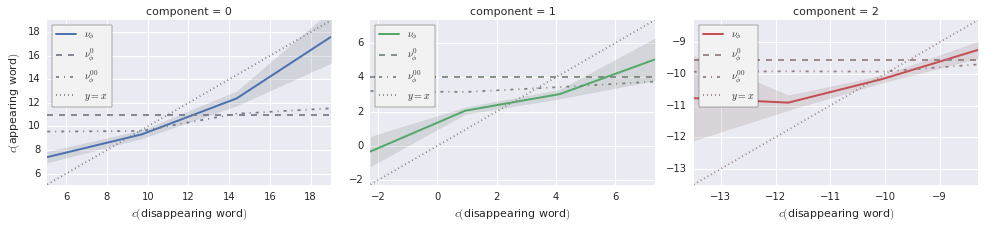

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 4 components.

Those explain the following variance:
[ 0.58162541  0.19162212  0.1283333   0.03958219]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,0.745880,0.077106,-0.299950,0.532759,-0.252752,0.005627
Component-1,0.461565,0.095146,-0.381859,-0.749734,0.264253,0.012561
Component-2,0.472786,-0.076394,0.864615,-0.146089,0.037497,-0.018195


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 44026) |            | Elapsed Time: 0:00:14 ETA:  7 days, 9:12:20

  0% (  100 of 44026) |                    | Elapsed Time: 0:00:15 ETA:  0:07:09

  0% (  193 of 44026) |                    | Elapsed Time: 0:00:16 ETA:  0:07:24

  0% (  295 of 44026) |                    | Elapsed Time: 0:00:17 ETA:  0:07:14

  0% (  404 of 44026) |                    | Elapsed Time: 0:00:18 ETA:  0:07:00

  1% (  515 of 44026) |                    | Elapsed Time: 0:00:19 ETA:  0:06:50

  1% (  551 of 44026) |                    | Elapsed Time: 0:00:19 ETA:  0:06:52

  1% (  657 of 44026) |                    | Elapsed Time: 0:00:20 ETA:  0:06:48

  1% (  766 of 44026) |                    | Elapsed Time: 0:00:21 ETA:  0:06:44

  1% (  877 of 44026) |                    | Elapsed Time: 0:00:22 ETA:  0:06:39

  2% (  982 of 44026) |                    | Elapsed Time: 0:00:23 ETA:  0:06:36

  2% ( 1101 of 44026) |                    | Elapsed Time: 0:00:25 ETA:  0:06:27

  2% ( 1207 of 44026) |                    | Elapsed Time: 0:00:26 ETA:  0:06:27

  2% ( 1315 of 44026) |                    | Elapsed Time: 0:00:27 ETA:  0:06:28

  3% ( 1419 of 44026) |                    | Elapsed Time: 0:00:28 ETA:  0:06:26

  3% ( 1500 of 44026) |                    | Elapsed Time: 0:00:29 ETA:  0:06:38

  3% ( 1557 of 44026) |                    | Elapsed Time: 0:00:30 ETA:  0:07:05

  3% ( 1616 of 44026) |                    | Elapsed Time: 0:00:31 ETA:  0:07:36

  3% ( 1651 of 44026) |                    | Elapsed Time: 0:00:31 ETA:  0:08:01

  3% ( 1710 of 44026) |                    | Elapsed Time: 0:00:32 ETA:  0:08:37

  4% ( 1765 of 44026) |                    | Elapsed Time: 0:00:33 ETA:  0:09:02

  4% ( 1827 of 44026) |                    | Elapsed Time: 0:00:34 ETA:  0:09:42

  4% ( 1893 of 44026) |                    | Elapsed Time: 0:00:35 ETA:  0:10:26

  4% ( 1969 of 44026) |                    | Elapsed Time: 0:00:36 ETA:  0:10:59

  4% ( 2079 of 44026) |                    | Elapsed Time: 0:00:37 ETA:  0:10:22

  4% ( 2174 of 44026) |                    | Elapsed Time: 0:00:38 ETA:  0:09:40

  5% ( 2202 of 44026) |#                   | Elapsed Time: 0:00:39 ETA:  0:09:19

  5% ( 2303 of 44026) |#                   | Elapsed Time: 0:00:40 ETA:  0:08:44

  5% ( 2401 of 44026) |#                   | Elapsed Time: 0:00:41 ETA:  0:08:11

  5% ( 2498 of 44026) |#                   | Elapsed Time: 0:00:42 ETA:  0:07:38

  5% ( 2607 of 44026) |#                   | Elapsed Time: 0:00:43 ETA:  0:07:07

  6% ( 2711 of 44026) |#                   | Elapsed Time: 0:00:44 ETA:  0:06:44

  6% ( 2752 of 44026) |#                   | Elapsed Time: 0:00:44 ETA:  0:06:28

  6% ( 2859 of 44026) |#                   | Elapsed Time: 0:00:45 ETA:  0:06:29

  6% ( 2979 of 44026) |#                   | Elapsed Time: 0:00:46 ETA:  0:06:14

  7% ( 3096 of 44026) |#                   | Elapsed Time: 0:00:47 ETA:  0:06:06

  7% ( 3213 of 44026) |#                   | Elapsed Time: 0:00:48 ETA:  0:05:58

  7% ( 3302 of 44026) |#                   | Elapsed Time: 0:00:49 ETA:  0:05:52

  7% ( 3406 of 44026) |#                   | Elapsed Time: 0:00:50 ETA:  0:05:48

  7% ( 3485 of 44026) |#                   | Elapsed Time: 0:00:51 ETA:  0:06:01

  8% ( 3570 of 44026) |#                   | Elapsed Time: 0:00:52 ETA:  0:06:09

  8% ( 3632 of 44026) |#                   | Elapsed Time: 0:00:53 ETA:  0:06:31

  8% ( 3685 of 44026) |#                   | Elapsed Time: 0:00:54 ETA:  0:06:58

  8% ( 3793 of 44026) |#                   | Elapsed Time: 0:00:55 ETA:  0:07:04

  8% ( 3853 of 44026) |#                   | Elapsed Time: 0:00:55 ETA:  0:07:17

  8% ( 3959 of 44026) |#                   | Elapsed Time: 0:00:56 ETA:  0:07:23

  9% ( 4062 of 44026) |#                   | Elapsed Time: 0:00:57 ETA:  0:07:24

  9% ( 4170 of 44026) |#                   | Elapsed Time: 0:00:58 ETA:  0:07:20

  9% ( 4226 of 44026) |#                   | Elapsed Time: 0:00:59 ETA:  0:07:35

  9% ( 4280 of 44026) |#                   | Elapsed Time: 0:01:00 ETA:  0:07:56

  9% ( 4363 of 44026) |#                   | Elapsed Time: 0:01:01 ETA:  0:07:39

 10% ( 4403 of 44026) |##                  | Elapsed Time: 0:01:02 ETA:  0:07:10

 10% ( 4486 of 44026) |##                  | Elapsed Time: 0:01:03 ETA:  0:07:27

 10% ( 4570 of 44026) |##                  | Elapsed Time: 0:01:04 ETA:  0:07:34

 10% ( 4657 of 44026) |##                  | Elapsed Time: 0:01:05 ETA:  0:07:47

 10% ( 4770 of 44026) |##                  | Elapsed Time: 0:01:06 ETA:  0:07:39

 11% ( 4873 of 44026) |##                  | Elapsed Time: 0:01:07 ETA:  0:07:42

 11% ( 4953 of 44026) |##                  | Elapsed Time: 0:01:08 ETA:  0:06:58

 11% ( 5040 of 44026) |##                  | Elapsed Time: 0:01:09 ETA:  0:06:55

 11% ( 5126 of 44026) |##                  | Elapsed Time: 0:01:10 ETA:  0:07:00

 11% ( 5211 of 44026) |##                  | Elapsed Time: 0:01:11 ETA:  0:06:58

 12% ( 5298 of 44026) |##                  | Elapsed Time: 0:01:12 ETA:  0:06:54

 12% ( 5379 of 44026) |##                  | Elapsed Time: 0:01:13 ETA:  0:06:57

 12% ( 5463 of 44026) |##                  | Elapsed Time: 0:01:14 ETA:  0:07:17

 12% ( 5504 of 44026) |##                  | Elapsed Time: 0:01:14 ETA:  0:07:31

 12% ( 5593 of 44026) |##                  | Elapsed Time: 0:01:15 ETA:  0:07:23

 12% ( 5679 of 44026) |##                  | Elapsed Time: 0:01:16 ETA:  0:07:21

 13% ( 5766 of 44026) |##                  | Elapsed Time: 0:01:17 ETA:  0:07:20

 13% ( 5855 of 44026) |##                  | Elapsed Time: 0:01:18 ETA:  0:07:16

 13% ( 5939 of 44026) |##                  | Elapsed Time: 0:01:19 ETA:  0:07:15

 13% ( 6026 of 44026) |##                  | Elapsed Time: 0:01:21 ETA:  0:07:15

 13% ( 6054 of 44026) |##                  | Elapsed Time: 0:01:21 ETA:  0:07:13

 13% ( 6144 of 44026) |##                  | Elapsed Time: 0:01:22 ETA:  0:07:08

 14% ( 6234 of 44026) |##                  | Elapsed Time: 0:01:23 ETA:  0:07:03

 14% ( 6321 of 44026) |##                  | Elapsed Time: 0:01:24 ETA:  0:07:03

 14% ( 6408 of 44026) |##                  | Elapsed Time: 0:01:25 ETA:  0:07:02

 14% ( 6498 of 44026) |##                  | Elapsed Time: 0:01:26 ETA:  0:07:00

 14% ( 6584 of 44026) |##                  | Elapsed Time: 0:01:27 ETA:  0:07:02

 15% ( 6604 of 44026) |###                 | Elapsed Time: 0:01:27 ETA:  0:06:59

 15% ( 6692 of 44026) |###                 | Elapsed Time: 0:01:28 ETA:  0:06:57

 15% ( 6780 of 44026) |###                 | Elapsed Time: 0:01:29 ETA:  0:06:52

 15% ( 6872 of 44026) |###                 | Elapsed Time: 0:01:30 ETA:  0:06:50

 15% ( 6971 of 44026) |###                 | Elapsed Time: 0:01:31 ETA:  0:06:43

 16% ( 7067 of 44026) |###                 | Elapsed Time: 0:01:32 ETA:  0:06:36

 16% ( 7155 of 44026) |###                 | Elapsed Time: 0:01:33 ETA:  0:06:27

 16% ( 7263 of 44026) |###                 | Elapsed Time: 0:01:34 ETA:  0:06:14

 16% ( 7373 of 44026) |###                 | Elapsed Time: 0:01:35 ETA:  0:05:59

 17% ( 7486 of 44026) |###                 | Elapsed Time: 0:01:36 ETA:  0:05:49

 17% ( 7584 of 44026) |###                 | Elapsed Time: 0:01:37 ETA:  0:05:43

 17% ( 7683 of 44026) |###                 | Elapsed Time: 0:01:38 ETA:  0:05:37

 17% ( 7705 of 44026) |###                 | Elapsed Time: 0:01:38 ETA:  0:05:31

 17% ( 7793 of 44026) |###                 | Elapsed Time: 0:01:39 ETA:  0:05:35

 17% ( 7879 of 44026) |###                 | Elapsed Time: 0:01:40 ETA:  0:05:40

 18% ( 7969 of 44026) |###                 | Elapsed Time: 0:01:41 ETA:  0:05:45

 18% ( 8059 of 44026) |###                 | Elapsed Time: 0:01:42 ETA:  0:05:54

 18% ( 8157 of 44026) |###                 | Elapsed Time: 0:01:43 ETA:  0:06:00

 18% ( 8255 of 44026) |###                 | Elapsed Time: 0:01:44 ETA:  0:06:14

 18% ( 8333 of 44026) |###                 | Elapsed Time: 0:01:45 ETA:  0:06:29

 19% ( 8412 of 44026) |###                 | Elapsed Time: 0:01:46 ETA:  0:06:37

 19% ( 8504 of 44026) |###                 | Elapsed Time: 0:01:47 ETA:  0:06:34

 19% ( 8601 of 44026) |###                 | Elapsed Time: 0:01:48 ETA:  0:06:24

 19% ( 8700 of 44026) |###                 | Elapsed Time: 0:01:49 ETA:  0:06:17

 20% ( 8806 of 44026) |####                | Elapsed Time: 0:01:51 ETA:  0:06:22

 20% ( 8890 of 44026) |####                | Elapsed Time: 0:01:52 ETA:  0:06:28

 20% ( 8999 of 44026) |####                | Elapsed Time: 0:01:53 ETA:  0:06:13

 20% ( 9108 of 44026) |####                | Elapsed Time: 0:01:54 ETA:  0:05:53

 20% ( 9210 of 44026) |####                | Elapsed Time: 0:01:55 ETA:  0:05:39

 21% ( 9315 of 44026) |####                | Elapsed Time: 0:01:56 ETA:  0:05:31

 21% ( 9356 of 44026) |####                | Elapsed Time: 0:01:56 ETA:  0:05:26

 21% ( 9469 of 44026) |####                | Elapsed Time: 0:01:57 ETA:  0:05:17

 21% ( 9569 of 44026) |####                | Elapsed Time: 0:01:58 ETA:  0:05:09

 21% ( 9663 of 44026) |####                | Elapsed Time: 0:01:59 ETA:  0:05:12

 22% ( 9756 of 44026) |####                | Elapsed Time: 0:02:00 ETA:  0:05:06

 22% ( 9859 of 44026) |####                | Elapsed Time: 0:02:01 ETA:  0:05:08

 22% ( 9906 of 44026) |####                | Elapsed Time: 0:02:01 ETA:  0:05:09

 22% (10005 of 44026) |####                | Elapsed Time: 0:02:02 ETA:  0:05:09

 22% (10110 of 44026) |####                | Elapsed Time: 0:02:03 ETA:  0:05:08

 23% (10213 of 44026) |####                | Elapsed Time: 0:02:04 ETA:  0:05:10

 23% (10314 of 44026) |####                | Elapsed Time: 0:02:05 ETA:  0:05:15

 23% (10426 of 44026) |####                | Elapsed Time: 0:02:06 ETA:  0:05:08

 23% (10457 of 44026) |####                | Elapsed Time: 0:02:07 ETA:  0:05:02

 24% (10576 of 44026) |####                | Elapsed Time: 0:02:08 ETA:  0:04:48

 24% (10688 of 44026) |####                | Elapsed Time: 0:02:09 ETA:  0:04:42

 24% (10799 of 44026) |####                | Elapsed Time: 0:02:10 ETA:  0:04:40

 24% (10910 of 44026) |####                | Elapsed Time: 0:02:11 ETA:  0:04:34

 25% (11007 of 44026) |#####               | Elapsed Time: 0:02:12 ETA:  0:04:33

 25% (11121 of 44026) |#####               | Elapsed Time: 0:02:13 ETA:  0:04:27

 25% (11232 of 44026) |#####               | Elapsed Time: 0:02:14 ETA:  0:04:21

 25% (11347 of 44026) |#####               | Elapsed Time: 0:02:15 ETA:  0:04:19

 25% (11446 of 44026) |#####               | Elapsed Time: 0:02:16 ETA:  0:04:23

 26% (11529 of 44026) |#####               | Elapsed Time: 0:02:17 ETA:  0:04:37

 26% (11557 of 44026) |#####               | Elapsed Time: 0:02:17 ETA:  0:04:44

 26% (11639 of 44026) |#####               | Elapsed Time: 0:02:18 ETA:  0:04:58

 26% (11729 of 44026) |#####               | Elapsed Time: 0:02:19 ETA:  0:05:08

 26% (11843 of 44026) |#####               | Elapsed Time: 0:02:20 ETA:  0:05:02

 27% (11970 of 44026) |#####               | Elapsed Time: 0:02:21 ETA:  0:04:54

 27% (12073 of 44026) |#####               | Elapsed Time: 0:02:22 ETA:  0:04:57

 27% (12108 of 44026) |#####               | Elapsed Time: 0:02:22 ETA:  0:05:03

 27% (12219 of 44026) |#####               | Elapsed Time: 0:02:23 ETA:  0:04:54

 27% (12311 of 44026) |#####               | Elapsed Time: 0:02:24 ETA:  0:04:49

 28% (12412 of 44026) |#####               | Elapsed Time: 0:02:25 ETA:  0:04:44

 28% (12506 of 44026) |#####               | Elapsed Time: 0:02:26 ETA:  0:04:37

 28% (12595 of 44026) |#####               | Elapsed Time: 0:02:27 ETA:  0:04:36

 28% (12658 of 44026) |#####               | Elapsed Time: 0:02:28 ETA:  0:04:49

 28% (12740 of 44026) |#####               | Elapsed Time: 0:02:29 ETA:  0:05:13

 29% (12831 of 44026) |#####               | Elapsed Time: 0:02:30 ETA:  0:05:19

 29% (12921 of 44026) |#####               | Elapsed Time: 0:02:31 ETA:  0:05:24

 29% (13003 of 44026) |#####               | Elapsed Time: 0:02:32 ETA:  0:05:41

 29% (13096 of 44026) |#####               | Elapsed Time: 0:02:33 ETA:  0:05:40

 30% (13208 of 44026) |######              | Elapsed Time: 0:02:34 ETA:  0:05:41

 30% (13331 of 44026) |######              | Elapsed Time: 0:02:35 ETA:  0:05:17

 30% (13438 of 44026) |######              | Elapsed Time: 0:02:36 ETA:  0:05:03

 30% (13552 of 44026) |######              | Elapsed Time: 0:02:37 ETA:  0:04:44

 31% (13656 of 44026) |######              | Elapsed Time: 0:02:38 ETA:  0:04:36

 31% (13759 of 44026) |######              | Elapsed Time: 0:02:39 ETA:  0:04:25

 31% (13866 of 44026) |######              | Elapsed Time: 0:02:40 ETA:  0:04:11

 31% (13977 of 44026) |######              | Elapsed Time: 0:02:41 ETA:  0:04:02

 31% (14077 of 44026) |######              | Elapsed Time: 0:02:42 ETA:  0:04:02

 32% (14184 of 44026) |######              | Elapsed Time: 0:02:43 ETA:  0:04:00

 32% (14309 of 44026) |######              | Elapsed Time: 0:02:44 ETA:  0:04:01

 32% (14424 of 44026) |######              | Elapsed Time: 0:02:45 ETA:  0:03:59

 33% (14531 of 44026) |######              | Elapsed Time: 0:02:46 ETA:  0:03:57

 33% (14641 of 44026) |######              | Elapsed Time: 0:02:47 ETA:  0:03:56

 33% (14750 of 44026) |######              | Elapsed Time: 0:02:48 ETA:  0:03:54

 33% (14859 of 44026) |######              | Elapsed Time: 0:02:49 ETA:  0:03:47

 34% (14973 of 44026) |######              | Elapsed Time: 0:02:50 ETA:  0:03:39

 34% (15062 of 44026) |######              | Elapsed Time: 0:02:51 ETA:  0:03:46

 34% (15175 of 44026) |######              | Elapsed Time: 0:02:52 ETA:  0:03:47

 34% (15284 of 44026) |######              | Elapsed Time: 0:02:53 ETA:  0:03:47

 34% (15389 of 44026) |######              | Elapsed Time: 0:02:54 ETA:  0:03:50

 35% (15410 of 44026) |#######             | Elapsed Time: 0:02:55 ETA:  0:03:50

 35% (15491 of 44026) |#######             | Elapsed Time: 0:02:56 ETA:  0:04:03

 35% (15564 of 44026) |#######             | Elapsed Time: 0:02:57 ETA:  0:04:21

 35% (15655 of 44026) |#######             | Elapsed Time: 0:02:58 ETA:  0:04:38

 35% (15730 of 44026) |#######             | Elapsed Time: 0:02:59 ETA:  0:05:01

 35% (15814 of 44026) |#######             | Elapsed Time: 0:03:00 ETA:  0:05:04

 36% (15894 of 44026) |#######             | Elapsed Time: 0:03:01 ETA:  0:05:25

 36% (15960 of 44026) |#######             | Elapsed Time: 0:03:01 ETA:  0:05:46

 36% (16063 of 44026) |#######             | Elapsed Time: 0:03:02 ETA:  0:05:47

 36% (16159 of 44026) |#######             | Elapsed Time: 0:03:03 ETA:  0:05:40

 36% (16243 of 44026) |#######             | Elapsed Time: 0:03:04 ETA:  0:05:36

 37% (16339 of 44026) |#######             | Elapsed Time: 0:03:05 ETA:  0:05:19

 37% (16452 of 44026) |#######             | Elapsed Time: 0:03:06 ETA:  0:05:04

 37% (16510 of 44026) |#######             | Elapsed Time: 0:03:07 ETA:  0:04:45

 37% (16601 of 44026) |#######             | Elapsed Time: 0:03:08 ETA:  0:04:40

 37% (16657 of 44026) |#######             | Elapsed Time: 0:03:09 ETA:  0:04:53

 38% (16749 of 44026) |#######             | Elapsed Time: 0:03:10 ETA:  0:04:45

 38% (16872 of 44026) |#######             | Elapsed Time: 0:03:11 ETA:  0:04:32

 38% (16976 of 44026) |#######             | Elapsed Time: 0:03:12 ETA:  0:04:26

 38% (17061 of 44026) |#######             | Elapsed Time: 0:03:13 ETA:  0:04:25

 38% (17145 of 44026) |#######             | Elapsed Time: 0:03:14 ETA:  0:04:31

 39% (17236 of 44026) |#######             | Elapsed Time: 0:03:15 ETA:  0:04:43

 39% (17346 of 44026) |#######             | Elapsed Time: 0:03:16 ETA:  0:04:40

 39% (17463 of 44026) |#######             | Elapsed Time: 0:03:17 ETA:  0:04:24

 39% (17587 of 44026) |#######             | Elapsed Time: 0:03:18 ETA:  0:03:50

 40% (17611 of 44026) |########            | Elapsed Time: 0:03:18 ETA:  0:03:45

 40% (17718 of 44026) |########            | Elapsed Time: 0:03:19 ETA:  0:03:51

 40% (17815 of 44026) |########            | Elapsed Time: 0:03:20 ETA:  0:03:54

 40% (17938 of 44026) |########            | Elapsed Time: 0:03:21 ETA:  0:03:34

 40% (18038 of 44026) |########            | Elapsed Time: 0:03:22 ETA:  0:03:26

 41% (18161 of 44026) |########            | Elapsed Time: 0:03:23 ETA:  0:03:19

 41% (18262 of 44026) |########            | Elapsed Time: 0:03:25 ETA:  0:03:27

 41% (18375 of 44026) |########            | Elapsed Time: 0:03:26 ETA:  0:03:32

 42% (18491 of 44026) |########            | Elapsed Time: 0:03:27 ETA:  0:03:25

 42% (18601 of 44026) |########            | Elapsed Time: 0:03:28 ETA:  0:03:23

 42% (18680 of 44026) |########            | Elapsed Time: 0:03:29 ETA:  0:03:30

 42% (18712 of 44026) |########            | Elapsed Time: 0:03:29 ETA:  0:03:45

 42% (18789 of 44026) |########            | Elapsed Time: 0:03:30 ETA:  0:03:58

 42% (18885 of 44026) |########            | Elapsed Time: 0:03:31 ETA:  0:04:02

 43% (18988 of 44026) |########            | Elapsed Time: 0:03:32 ETA:  0:03:58

 43% (19092 of 44026) |########            | Elapsed Time: 0:03:33 ETA:  0:03:55

 43% (19199 of 44026) |########            | Elapsed Time: 0:03:34 ETA:  0:03:57

 43% (19262 of 44026) |########            | Elapsed Time: 0:03:35 ETA:  0:04:05

 43% (19366 of 44026) |########            | Elapsed Time: 0:03:36 ETA:  0:04:08

 44% (19472 of 44026) |########            | Elapsed Time: 0:03:37 ETA:  0:03:51

 44% (19569 of 44026) |########            | Elapsed Time: 0:03:38 ETA:  0:03:47

 44% (19674 of 44026) |########            | Elapsed Time: 0:03:39 ETA:  0:03:31

 44% (19786 of 44026) |########            | Elapsed Time: 0:03:40 ETA:  0:03:23

 45% (19812 of 44026) |#########           | Elapsed Time: 0:03:40 ETA:  0:03:20

 45% (19932 of 44026) |#########           | Elapsed Time: 0:03:41 ETA:  0:03:11

 45% (20046 of 44026) |#########           | Elapsed Time: 0:03:42 ETA:  0:03:07

 45% (20169 of 44026) |#########           | Elapsed Time: 0:03:43 ETA:  0:02:58

 46% (20288 of 44026) |#########           | Elapsed Time: 0:03:44 ETA:  0:02:50

 46% (20363 of 44026) |#########           | Elapsed Time: 0:03:45 ETA:  0:02:46

 46% (20471 of 44026) |#########           | Elapsed Time: 0:03:46 ETA:  0:02:40

 46% (20584 of 44026) |#########           | Elapsed Time: 0:03:47 ETA:  0:02:36

 46% (20689 of 44026) |#########           | Elapsed Time: 0:03:48 ETA:  0:02:38

 47% (20819 of 44026) |#########           | Elapsed Time: 0:03:49 ETA:  0:02:31

 47% (20913 of 44026) |#########           | Elapsed Time: 0:03:50 ETA:  0:02:40

 47% (20999 of 44026) |#########           | Elapsed Time: 0:03:51 ETA:  0:02:50

 47% (21102 of 44026) |#########           | Elapsed Time: 0:03:52 ETA:  0:02:58

 48% (21195 of 44026) |#########           | Elapsed Time: 0:03:53 ETA:  0:03:09

 48% (21268 of 44026) |#########           | Elapsed Time: 0:03:54 ETA:  0:03:25

 48% (21374 of 44026) |#########           | Elapsed Time: 0:03:55 ETA:  0:03:25

 48% (21378 of 44026) |#########           | Elapsed Time: 0:03:57 ETA:  0:05:40

 48% (21463 of 44026) |#########           | Elapsed Time: 0:03:58 ETA:  0:05:44

 48% (21570 of 44026) |#########           | Elapsed Time: 0:03:59 ETA:  0:06:01

 49% (21660 of 44026) |#########           | Elapsed Time: 0:04:00 ETA:  0:06:04

 49% (21757 of 44026) |#########           | Elapsed Time: 0:04:01 ETA:  0:05:54

 49% (21823 of 44026) |#########           | Elapsed Time: 0:04:02 ETA:  0:06:24

 49% (21908 of 44026) |#########           | Elapsed Time: 0:04:03 ETA:  0:06:30

 49% (21993 of 44026) |#########           | Elapsed Time: 0:04:04 ETA:  0:06:18

 50% (22014 of 44026) |##########          | Elapsed Time: 0:04:04 ETA:  0:06:48

 50% (22114 of 44026) |##########          | Elapsed Time: 0:04:05 ETA:  0:03:59

 50% (22217 of 44026) |##########          | Elapsed Time: 0:04:06 ETA:  0:03:56

 50% (22316 of 44026) |##########          | Elapsed Time: 0:04:07 ETA:  0:04:01

 50% (22390 of 44026) |##########          | Elapsed Time: 0:04:08 ETA:  0:04:11

 51% (22477 of 44026) |##########          | Elapsed Time: 0:04:09 ETA:  0:04:17

 51% (22564 of 44026) |##########          | Elapsed Time: 0:04:10 ETA:  0:03:54

 51% (22658 of 44026) |##########          | Elapsed Time: 0:04:11 ETA:  0:03:47

 51% (22751 of 44026) |##########          | Elapsed Time: 0:04:12 ETA:  0:03:41

 51% (22860 of 44026) |##########          | Elapsed Time: 0:04:13 ETA:  0:03:31

 52% (22962 of 44026) |##########          | Elapsed Time: 0:04:14 ETA:  0:03:29

 52% (23056 of 44026) |##########          | Elapsed Time: 0:04:15 ETA:  0:03:33

 52% (23114 of 44026) |##########          | Elapsed Time: 0:04:16 ETA:  0:03:36

 52% (23209 of 44026) |##########          | Elapsed Time: 0:04:17 ETA:  0:03:23

 52% (23306 of 44026) |##########          | Elapsed Time: 0:04:18 ETA:  0:03:17

 53% (23420 of 44026) |##########          | Elapsed Time: 0:04:19 ETA:  0:03:08

 53% (23511 of 44026) |##########          | Elapsed Time: 0:04:20 ETA:  0:03:08

 53% (23602 of 44026) |##########          | Elapsed Time: 0:04:21 ETA:  0:03:08

 53% (23664 of 44026) |##########          | Elapsed Time: 0:04:21 ETA:  0:03:17

 53% (23753 of 44026) |##########          | Elapsed Time: 0:04:22 ETA:  0:03:23

 54% (23855 of 44026) |##########          | Elapsed Time: 0:04:23 ETA:  0:03:17

 54% (23955 of 44026) |##########          | Elapsed Time: 0:04:24 ETA:  0:03:12

 54% (24064 of 44026) |##########          | Elapsed Time: 0:04:25 ETA:  0:03:03

 54% (24168 of 44026) |##########          | Elapsed Time: 0:04:26 ETA:  0:02:59

 55% (24215 of 44026) |###########         | Elapsed Time: 0:04:27 ETA:  0:03:08

 55% (24319 of 44026) |###########         | Elapsed Time: 0:04:28 ETA:  0:03:00

 55% (24442 of 44026) |###########         | Elapsed Time: 0:04:29 ETA:  0:02:42

 55% (24561 of 44026) |###########         | Elapsed Time: 0:04:30 ETA:  0:02:28

 56% (24662 of 44026) |###########         | Elapsed Time: 0:04:31 ETA:  0:02:22

 56% (24765 of 44026) |###########         | Elapsed Time: 0:04:32 ETA:  0:02:26

 56% (24856 of 44026) |###########         | Elapsed Time: 0:04:33 ETA:  0:02:35

 56% (24977 of 44026) |###########         | Elapsed Time: 0:04:34 ETA:  0:02:25

 56% (25091 of 44026) |###########         | Elapsed Time: 0:04:35 ETA:  0:02:17

 57% (25207 of 44026) |###########         | Elapsed Time: 0:04:36 ETA:  0:02:10

 57% (25315 of 44026) |###########         | Elapsed Time: 0:04:37 ETA:  0:02:07

 57% (25419 of 44026) |###########         | Elapsed Time: 0:04:38 ETA:  0:02:13

 58% (25543 of 44026) |###########         | Elapsed Time: 0:04:39 ETA:  0:02:01

 58% (25656 of 44026) |###########         | Elapsed Time: 0:04:40 ETA:  0:01:50

 58% (25750 of 44026) |###########         | Elapsed Time: 0:04:41 ETA:  0:01:54

 58% (25866 of 44026) |###########         | Elapsed Time: 0:04:42 ETA:  0:01:51

 58% (25961 of 44026) |###########         | Elapsed Time: 0:04:43 ETA:  0:01:59

 59% (26062 of 44026) |###########         | Elapsed Time: 0:04:44 ETA:  0:02:05

 59% (26158 of 44026) |###########         | Elapsed Time: 0:04:45 ETA:  0:02:18

 59% (26253 of 44026) |###########         | Elapsed Time: 0:04:46 ETA:  0:02:22

 59% (26370 of 44026) |###########         | Elapsed Time: 0:04:47 ETA:  0:02:25

 60% (26416 of 44026) |############        | Elapsed Time: 0:04:47 ETA:  0:02:25

 60% (26521 of 44026) |############        | Elapsed Time: 0:04:48 ETA:  0:02:18

 60% (26635 of 44026) |############        | Elapsed Time: 0:04:49 ETA:  0:02:13

 60% (26726 of 44026) |############        | Elapsed Time: 0:04:50 ETA:  0:02:19

 60% (26813 of 44026) |############        | Elapsed Time: 0:04:51 ETA:  0:02:22

 61% (26921 of 44026) |############        | Elapsed Time: 0:04:52 ETA:  0:02:17

 61% (26966 of 44026) |############        | Elapsed Time: 0:04:53 ETA:  0:02:12

 61% (27072 of 44026) |############        | Elapsed Time: 0:04:54 ETA:  0:02:05

 61% (27187 of 44026) |############        | Elapsed Time: 0:04:55 ETA:  0:02:05

 61% (27292 of 44026) |############        | Elapsed Time: 0:04:56 ETA:  0:02:08

 62% (27393 of 44026) |############        | Elapsed Time: 0:04:57 ETA:  0:02:09

 62% (27517 of 44026) |############        | Elapsed Time: 0:04:58 ETA:  0:02:02

 62% (27616 of 44026) |############        | Elapsed Time: 0:04:59 ETA:  0:01:55

 62% (27702 of 44026) |############        | Elapsed Time: 0:05:00 ETA:  0:02:06

 63% (27833 of 44026) |############        | Elapsed Time: 0:05:01 ETA:  0:01:53

 63% (27956 of 44026) |############        | Elapsed Time: 0:05:02 ETA:  0:01:44

 63% (28067 of 44026) |############        | Elapsed Time: 0:05:03 ETA:  0:01:52

 64% (28187 of 44026) |############        | Elapsed Time: 0:05:04 ETA:  0:01:41

 64% (28288 of 44026) |############        | Elapsed Time: 0:05:05 ETA:  0:01:45

 64% (28413 of 44026) |############        | Elapsed Time: 0:05:06 ETA:  0:01:36

 64% (28525 of 44026) |############        | Elapsed Time: 0:05:07 ETA:  0:01:29

 65% (28617 of 44026) |#############       | Elapsed Time: 0:05:08 ETA:  0:01:15

 65% (28701 of 44026) |#############       | Elapsed Time: 0:05:09 ETA:  0:01:35

 65% (28799 of 44026) |#############       | Elapsed Time: 0:05:10 ETA:  0:01:45

 65% (28903 of 44026) |#############       | Elapsed Time: 0:05:11 ETA:  0:01:41

 65% (29017 of 44026) |#############       | Elapsed Time: 0:05:12 ETA:  0:01:36

 66% (29116 of 44026) |#############       | Elapsed Time: 0:05:13 ETA:  0:01:44

 66% (29168 of 44026) |#############       | Elapsed Time: 0:05:14 ETA:  0:01:40

 66% (29298 of 44026) |#############       | Elapsed Time: 0:05:15 ETA:  0:01:37

 66% (29425 of 44026) |#############       | Elapsed Time: 0:05:16 ETA:  0:01:29

 67% (29540 of 44026) |#############       | Elapsed Time: 0:05:17 ETA:  0:01:29

 67% (29665 of 44026) |#############       | Elapsed Time: 0:05:18 ETA:  0:01:10

 67% (29718 of 44026) |#############       | Elapsed Time: 0:05:18 ETA:  0:01:02

 67% (29845 of 44026) |#############       | Elapsed Time: 0:05:19 ETA:  0:00:51

 68% (29973 of 44026) |#############       | Elapsed Time: 0:05:20 ETA:  0:00:45

 68% (30085 of 44026) |#############       | Elapsed Time: 0:05:21 ETA:  0:00:39

 68% (30184 of 44026) |#############       | Elapsed Time: 0:05:22 ETA:  0:00:44

 68% (30268 of 44026) |#############       | Elapsed Time: 0:05:23 ETA:  0:00:53

 68% (30361 of 44026) |#############       | Elapsed Time: 0:05:24 ETA:  0:01:06

 69% (30479 of 44026) |#############       | Elapsed Time: 0:05:25 ETA:  0:01:04

 69% (30596 of 44026) |#############       | Elapsed Time: 0:05:26 ETA:  0:01:06

 69% (30704 of 44026) |#############       | Elapsed Time: 0:05:27 ETA:  0:01:09

 70% (30819 of 44026) |##############      | Elapsed Time: 0:05:28 ETA:  0:01:05

 70% (30943 of 44026) |##############      | Elapsed Time: 0:05:29 ETA:  0:01:06

 70% (31016 of 44026) |##############      | Elapsed Time: 0:05:30 ETA:  0:01:22

 70% (31110 of 44026) |##############      | Elapsed Time: 0:05:31 ETA:  0:01:23

 70% (31232 of 44026) |##############      | Elapsed Time: 0:05:32 ETA:  0:01:14

 71% (31369 of 44026) |##############      | Elapsed Time: 0:05:33 ETA:  0:01:02

 71% (31453 of 44026) |##############      | Elapsed Time: 0:05:34 ETA:  0:01:16

 71% (31571 of 44026) |##############      | Elapsed Time: 0:05:35 ETA:  0:01:09

 71% (31642 of 44026) |##############      | Elapsed Time: 0:05:36 ETA:  0:01:40

 72% (31723 of 44026) |##############      | Elapsed Time: 0:05:37 ETA:  0:02:03

 72% (31831 of 44026) |##############      | Elapsed Time: 0:05:38 ETA:  0:01:42

 72% (31919 of 44026) |##############      | Elapsed Time: 0:05:39 ETA:  0:01:30

 72% (32036 of 44026) |##############      | Elapsed Time: 0:05:40 ETA:  0:01:31

 73% (32142 of 44026) |##############      | Elapsed Time: 0:05:41 ETA:  0:01:40

 73% (32261 of 44026) |##############      | Elapsed Time: 0:05:42 ETA:  0:01:31

 73% (32355 of 44026) |##############      | Elapsed Time: 0:05:43 ETA:  0:01:26

 73% (32470 of 44026) |##############      | Elapsed Time: 0:05:44 ETA:  0:01:14

 73% (32578 of 44026) |##############      | Elapsed Time: 0:05:45 ETA:  0:00:59

 74% (32671 of 44026) |##############      | Elapsed Time: 0:05:46 ETA:  0:01:06

 74% (32796 of 44026) |##############      | Elapsed Time: 0:05:47 ETA:  0:01:01

 74% (32878 of 44026) |##############      | Elapsed Time: 0:05:48 ETA:  0:01:16

 74% (32974 of 44026) |##############      | Elapsed Time: 0:05:49 ETA:  0:01:20

 75% (33020 of 44026) |###############     | Elapsed Time: 0:05:49 ETA:  0:01:28

 75% (33163 of 44026) |###############     | Elapsed Time: 0:05:50 ETA:  0:01:00

 75% (33294 of 44026) |###############     | Elapsed Time: 0:05:51 ETA:  0:00:46

 75% (33416 of 44026) |###############     | Elapsed Time: 0:05:52 ETA:  0:00:40

 76% (33511 of 44026) |###############     | Elapsed Time: 0:05:53 ETA:  0:00:45

 76% (33570 of 44026) |###############     | Elapsed Time: 0:05:54 ETA:  0:00:36

 76% (33672 of 44026) |###############     | Elapsed Time: 0:05:55 ETA:  0:00:46

 76% (33797 of 44026) |###############     | Elapsed Time: 0:05:56 ETA:  0:00:26

 77% (33913 of 44026) |###############     | Elapsed Time: 0:05:57 ETA:  0:00:17

 77% (34029 of 44026) |###############     | Elapsed Time: 0:05:58 ETA:  0:00:15

 77% (34121 of 44026) |###############     | Elapsed Time: 0:05:59 ETA:  0:00:44

 77% (34247 of 44026) |###############     | Elapsed Time: 0:06:00 ETA:  0:00:41

 77% (34319 of 44026) |###############     | Elapsed Time: 0:06:01 ETA:  0:00:52

 78% (34408 of 44026) |###############     | Elapsed Time: 0:06:02 ETA:  0:01:01

 78% (34494 of 44026) |###############     | Elapsed Time: 0:06:03 ETA:  0:01:08

 78% (34613 of 44026) |###############     | Elapsed Time: 0:06:04 ETA:  0:01:10

 78% (34671 of 44026) |###############     | Elapsed Time: 0:06:04 ETA:  0:01:21

 79% (34816 of 44026) |###############     | Elapsed Time: 0:06:05 ETA:  0:01:04

 79% (34902 of 44026) |###############     | Elapsed Time: 0:06:06 ETA:  0:01:05

 79% (35029 of 44026) |###############     | Elapsed Time: 0:06:07 ETA:  0:00:53

 79% (35144 of 44026) |###############     | Elapsed Time: 0:06:08 ETA:  0:00:57

 80% (35221 of 44026) |################    | Elapsed Time: 0:06:09 ETA:  0:00:35

 80% (35337 of 44026) |################    | Elapsed Time: 0:06:10 ETA:  0:00:22

 80% (35456 of 44026) |################    | Elapsed Time: 0:06:11 ETA:  0:00:09

 80% (35593 of 44026) |################    | Elapsed Time: 0:06:12 ETA:  0:00:01

 81% (35715 of 44026) |################    | Elapsed Time: 0:06:13 ETA:  0:00:00

 81% (35772 of 44026) |################    | Elapsed Time: 0:06:14 ETA:  0:00:15

 81% (35871 of 44026) |################    | Elapsed Time: 0:06:15 ETA:  0:00:09

 81% (35980 of 44026) |################    | Elapsed Time: 0:06:16 ETA:  0:00:15

 82% (36108 of 44026) |################    | Elapsed Time: 0:06:17 ETA:  0:00:09

 82% (36219 of 44026) |################    | Elapsed Time: 0:06:18 ETA:  0:00:12

 82% (36284 of 44026) |################    | Elapsed Time: 0:06:19 ETA:  0:00:32

 82% (36322 of 44026) |################    | Elapsed Time: 0:06:20 ETA:  0:00:47

 82% (36414 of 44026) |################    | Elapsed Time: 0:06:21 ETA:  0:01:09

 82% (36541 of 44026) |################    | Elapsed Time: 0:06:22 ETA:  0:01:05

 83% (36639 of 44026) |################    | Elapsed Time: 0:06:23 ETA:  0:00:54

 83% (36743 of 44026) |################    | Elapsed Time: 0:06:24 ETA:  0:00:50

 83% (36872 of 44026) |################    | Elapsed Time: 0:06:25 ETA:  0:00:58

 84% (36984 of 44026) |################    | Elapsed Time: 0:06:26 ETA:  0:00:56

 84% (37104 of 44026) |################    | Elapsed Time: 0:06:27 ETA:  0:00:25

 84% (37218 of 44026) |################    | Elapsed Time: 0:06:28 ETA:  0:00:11

 84% (37305 of 44026) |################    | Elapsed Time: 0:06:29 ETA:  0:00:12

 85% (37423 of 44026) |#################   | Elapsed Time: 0:06:30 ETA:  0:00:17

 85% (37531 of 44026) |#################   | Elapsed Time: 0:06:31 ETA:  0:00:14

 85% (37635 of 44026) |#################   | Elapsed Time: 0:06:32 ETA:  0:00:20

 85% (37741 of 44026) |#################   | Elapsed Time: 0:06:33 ETA:  0:00:20

 85% (37848 of 44026) |#################   | Elapsed Time: 0:06:34 ETA:  0:00:22

 86% (37973 of 44026) |#################   | Elapsed Time: 0:06:35 ETA:  0:00:27

 86% (38100 of 44026) |#################   | Elapsed Time: 0:06:36 ETA:  0:00:05

 86% (38217 of 44026) |#################   | Elapsed Time: 0:06:37 ETA:  0:00:00

 87% (38323 of 44026) |#################   | Elapsed Time: 0:06:38 ETA:  0:00:00

 87% (38432 of 44026) |#################   | Elapsed Time: 0:06:39 ETA:  0:00:00

 87% (38523 of 44026) |#################   | Elapsed Time: 0:06:40 ETA:  0:00:00

 87% (38651 of 44026) |#################   | Elapsed Time: 0:06:41 ETA:  0:00:00

 88% (38779 of 44026) |#################   | Elapsed Time: 0:06:42 ETA:  0:00:00

 88% (38902 of 44026) |#################   | Elapsed Time: 0:06:43 ETA:  0:00:00

 88% (39022 of 44026) |#################   | Elapsed Time: 0:06:44 ETA:  0:00:00

 88% (39074 of 44026) |#################   | Elapsed Time: 0:06:44 ETA:  0:00:00

 89% (39197 of 44026) |#################   | Elapsed Time: 0:06:45 ETA:  0:00:00

 89% (39305 of 44026) |#################   | Elapsed Time: 0:06:46 ETA:  0:00:00

 89% (39405 of 44026) |#################   | Elapsed Time: 0:06:47 ETA:  0:00:00

 89% (39524 of 44026) |#################   | Elapsed Time: 0:06:48 ETA:  0:00:00

 90% (39624 of 44026) |##################  | Elapsed Time: 0:06:49 ETA:  0:00:00

 90% (39749 of 44026) |##################  | Elapsed Time: 0:06:50 ETA:  0:00:00

 90% (39864 of 44026) |##################  | Elapsed Time: 0:06:51 ETA:  0:00:00

 90% (39977 of 44026) |##################  | Elapsed Time: 0:06:52 ETA:  0:00:00

 91% (40097 of 44026) |##################  | Elapsed Time: 0:06:53 ETA:  0:00:00

 91% (40174 of 44026) |##################  | Elapsed Time: 0:06:54 ETA:  0:00:00

 91% (40294 of 44026) |##################  | Elapsed Time: 0:06:55 ETA:  0:00:00

 91% (40404 of 44026) |##################  | Elapsed Time: 0:06:56 ETA:  0:00:00

 92% (40518 of 44026) |##################  | Elapsed Time: 0:06:57 ETA:  0:00:00

 92% (40615 of 44026) |##################  | Elapsed Time: 0:06:58 ETA:  0:00:00

 92% (40725 of 44026) |##################  | Elapsed Time: 0:06:59 ETA:  0:00:00

 92% (40842 of 44026) |##################  | Elapsed Time: 0:07:00 ETA:  0:00:00

 93% (40979 of 44026) |##################  | Elapsed Time: 0:07:01 ETA:  0:00:00

 93% (41089 of 44026) |##################  | Elapsed Time: 0:07:02 ETA:  0:00:00

 93% (41198 of 44026) |##################  | Elapsed Time: 0:07:03 ETA:  0:00:00

 93% (41275 of 44026) |##################  | Elapsed Time: 0:07:03 ETA:  0:00:00

 93% (41379 of 44026) |##################  | Elapsed Time: 0:07:04 ETA:  0:00:00

 94% (41492 of 44026) |##################  | Elapsed Time: 0:07:05 ETA:  0:00:00

 94% (41606 of 44026) |##################  | Elapsed Time: 0:07:06 ETA:  0:00:00

 94% (41730 of 44026) |##################  | Elapsed Time: 0:07:07 ETA:  0:00:00

 95% (41825 of 44026) |################### | Elapsed Time: 0:07:08 ETA:  0:00:00

 95% (41946 of 44026) |################### | Elapsed Time: 0:07:09 ETA:  0:00:00

 95% (42060 of 44026) |################### | Elapsed Time: 0:07:10 ETA:  0:00:00

 95% (42196 of 44026) |################### | Elapsed Time: 0:07:11 ETA:  0:00:00

 96% (42305 of 44026) |################### | Elapsed Time: 0:07:12 ETA:  0:00:00

 96% (42376 of 44026) |################### | Elapsed Time: 0:07:13 ETA:  0:00:00

 96% (42500 of 44026) |################### | Elapsed Time: 0:07:14 ETA:  0:00:00

 96% (42624 of 44026) |################### | Elapsed Time: 0:07:15 ETA:  0:00:00

 97% (42735 of 44026) |################### | Elapsed Time: 0:07:16 ETA:  0:00:00

 97% (42835 of 44026) |################### | Elapsed Time: 0:07:17 ETA:  0:00:00

 97% (42926 of 44026) |################### | Elapsed Time: 0:07:18 ETA:  0:00:00

 97% (43052 of 44026) |################### | Elapsed Time: 0:07:19 ETA:  0:00:00

 98% (43161 of 44026) |################### | Elapsed Time: 0:07:20 ETA:  0:00:00

 98% (43290 of 44026) |################### | Elapsed Time: 0:07:21 ETA:  0:00:00

 98% (43429 of 44026) |################### | Elapsed Time: 0:07:22 ETA:  0:00:00

 98% (43476 of 44026) |################### | Elapsed Time: 0:07:22 ETA:  0:00:00

 99% (43589 of 44026) |################### | Elapsed Time: 0:07:23 ETA:  0:00:00

 99% (43713 of 44026) |################### | Elapsed Time: 0:07:24 ETA:  0:00:00

 99% (43829 of 44026) |################### | Elapsed Time: 0:07:25 ETA:  0:00:00

 99% (43955 of 44026) |################### | Elapsed Time: 0:07:26 ETA:  0:00:00

100% (44026 of 44026) |####################| Elapsed Time: 0:07:27 Time: 0:07:27


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

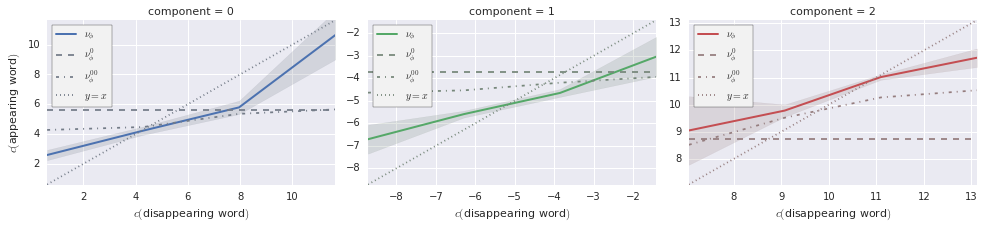

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1107 (cluster-unique) substitutions, but the PCA is in fact computed on 533 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.